In [65]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr
from flexitext import flexitext
import matplotlib.pyplot as plt



# Homemade functions

In [66]:

def plot_correlations_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal", "Neg_arousal"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Add annotations to the first plot. 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=.07, y=.55, fontsize=12)
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=.07, y=.4, fontsize=12)

    # Add annotations to the second plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=.07, y=-.95, fontsize=12)
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=.07, y=-1.05, fontsize=12)

    # Add annotations to the third plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=.03, y=.55, fontsize=12)
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=.03, y=.4, fontsize=12)

    # Add annotations to the fourth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=.03, y=-.95, fontsize=12)
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=.03, y=-1.05, fontsize=12)

    # Add annotations to the fifth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=.03, y=.55, fontsize=12)
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=.03, y=.4, fontsize=12)

    # Add annotations to the sixth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=.03, y=-.95, fontsize=12)
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=.03, y=-1.05, fontsize=12)

In [67]:
# Fuction to create scatter plots with corr.
def plot_correlations(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.regplot(data=data_df, x=NAcc_label, y="Pos_arousal", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [68]:
# Fuction to create scatter plots with corr.
def plot_correlations_2trailers(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.relplot(data=data_df, x=NAcc_label, y="Pos_arousal", hue="Type", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

# Clean data

In [69]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/GitHub


In [70]:
# Open csv file. 
all_subs_events_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation.csv')
all_subs_events_df.shape

(724, 26)

In [71]:
# Drop outliers from positive arousal. 
all_subs_events_df = all_subs_events_df[all_subs_events_df["Pos_arousal"] < 3]
all_subs_events_df.head()

Participant Trailer    Type  Onset  Offset  Duration  W_score  A_score  \
0      sub-01     rh6  Horror   12.0    42.0        30        3        3   
1      sub-01     uh1  Horror   60.0    90.0        30        1        3   
2      sub-01     rc2  Comedy  108.0   138.0        30        1        1   
3      sub-01     rh2  Horror  152.0   182.0        30        3        2   
4      sub-01     rh1  Horror  196.0   226.0        30        4        3   

   F_score  NAcc_onset  ...  AIns_offset  MPFC_offset  Pos_arousal  \
0        2    0.064028  ...     0.021953    -0.015770     1.834655   
1        3    0.195911  ...     0.084078     0.358385     1.223104   
2        3   -0.182903  ...     0.064891     0.112084     0.611552   
3        2   -0.182863  ...     0.189967     0.229560     1.528880   
4        2    0.122135  ...    -0.146827     0.358836     2.140431   

   Neg_arousal  NAcc_whole  AIns_whole  MPFC_whole  NAcc_ISC  AIns_ISC  \
0     0.000000   -0.042905   -0.088879   -0.007073  0.161305 -0.083295   
1     0.611552    0.175271   -0.086980    0.179370  0.163770 -0.042549   
2     0.000000    0.098620    0.087262    0.284549 -0.673301 -0.316322   
3    -0.305776   -0.090121   -0.054949   -0.115633  0.279242 -0.102774   
4    -0.305776    0.010083    0.050793    0.234606  0.083337  0.042852   

   MPFC_ISC  
0  0.234490  
1  0.286542  
2 -0.277064  
3  0.117268  
4  0.002471  

[5 rows x 26 columns]

In [72]:
# Separate files based on type of trailer. 
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Horror.csv')

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Comedy.csv')


# Visualize data 

## Behavioral Associations. 

In [73]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for both types of trailers. 
W_PA_All_corr = pearsonr(all_subs_events_df["W_score"], all_subs_events_df["Pos_arousal"])
A_PA_All_corr = pearsonr(all_subs_events_df["A_score"], all_subs_events_df["Pos_arousal"])

print("The correlation between W_score and Pos_arousal is: " + str(round(W_PA_All_corr[0], 4)) + " with a p-value of: " + str((W_PA_All_corr[1])))
print("The correlation between A_score and Pos_arousal is: " + str(round(A_PA_All_corr[0], 4)) + " with a p-value of: " + str((A_PA_All_corr[1])))


The correlation between W_score and Pos_arousal is: 0.7867 with a p-value of: 3.2870284953228507e-153
The correlation between A_score and Pos_arousal is: 0.6727 with a p-value of: 2.092537994024451e-96


In [74]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for comedy trailers.
W_PA_comedy_corr = pearsonr(all_subs_events_comedy["W_score"], all_subs_events_comedy["Pos_arousal"])
A_PA_comedy_corr = pearsonr(all_subs_events_comedy["A_score"], all_subs_events_comedy["Pos_arousal"])

print("The correlation between W_score and Pos_arousal for comedy trailers is: " + str(round(W_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((W_PA_comedy_corr[1])))
print("The correlation between A_score and Pos_arousal for comedy trailers is: " + str(round(A_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((A_PA_comedy_corr[1])))


The correlation between W_score and Pos_arousal for comedy trailers is: 0.8673 with a p-value of: 2.1417857599135588e-111
The correlation between A_score and Pos_arousal for comedy trailers is: 0.7925 with a p-value of: 1.598563880513366e-79


In [75]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for horror trailers.
W_PA_horror_corr = pearsonr(all_subs_events_horror["W_score"], all_subs_events_horror["Pos_arousal"])
A_PA_horror_corr = pearsonr(all_subs_events_horror["A_score"], all_subs_events_horror["Pos_arousal"])

print("The correlation between W_score and Pos_arousal for horror trailers is: " + str(round(W_PA_horror_corr[0], 4)) + " with a p-value of: " + str((W_PA_horror_corr[1])))
print("The correlation between A_score and Pos_arousal for horror trailers is: " + str(round(A_PA_horror_corr[0], 4)) + " with a p-value of: " + str((A_PA_horror_corr[1])))

The correlation between W_score and Pos_arousal for horror trailers is: 0.7385 with a p-value of: 2.9367973524649916e-63
The correlation between A_score and Pos_arousal for horror trailers is: 0.5974 with a p-value of: 3.3317139425651844e-36


## Neural Activation Whole Average 

In [76]:
# Correlation with Positive Arousal. 
NAcc_PA_whole_All_corr = pearsonr(all_subs_events_df["NAcc_whole"], all_subs_events_df["Pos_arousal"])
AIns_PA_whole_All_corr = pearsonr(all_subs_events_df["AIns_whole"], all_subs_events_df["Pos_arousal"])
MPFC_PA_whole_All_corr = pearsonr(all_subs_events_df["MPFC_whole"], all_subs_events_df["Pos_arousal"])

# Correlation with Negative Arousal.
NAcc_NA_whole_All_corr = pearsonr(all_subs_events_df["NAcc_whole"], all_subs_events_df["Neg_arousal"])
AIns_NA_whole_All_corr = pearsonr(all_subs_events_df["AIns_whole"], all_subs_events_df["Neg_arousal"])
MPFC_NA_whole_All_corr = pearsonr(all_subs_events_df["MPFC_whole"], all_subs_events_df["Neg_arousal"])

# Correlation with Watch Scores. 
NAcc_W_whole_All_corr = pearsonr(all_subs_events_df["NAcc_whole"], all_subs_events_df["W_score"])
AIns_W_whole_All_corr = pearsonr(all_subs_events_df["AIns_whole"], all_subs_events_df["W_score"])
MPFC_W_whole_All_corr = pearsonr(all_subs_events_df["MPFC_whole"], all_subs_events_df["W_score"])

print("For both types of trailers, the correlation between NAcc whole activation and positive arousal is: " + str(round(NAcc_PA_whole_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_whole_All_corr[1])))
print("For both types of trailers, the correlation between AIns whole activation and positive arousal is: " + str(round(AIns_PA_whole_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_whole_All_corr[1])))
print("For both types of trailers, the correlation between MPFC whole activation and positive arousal is: " + str(round(MPFC_PA_whole_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_whole_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc whole activation and negative arousal is: " + str(round(NAcc_NA_whole_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_whole_All_corr[1])))
print("For both types of trailers, the correlation between AIns whole activation and negative arousal is: " + str(round(AIns_NA_whole_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_whole_All_corr[1])))
print("For both types of trailers, the correlation between MPFC whole activation and negative arousal is: " + str(round(MPFC_NA_whole_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_whole_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc whole activation and watch scores is: " + str(round(NAcc_W_whole_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_whole_All_corr[1])))
print("For both types of trailers, the correlation between AIns whole activation and watch scores is: " + str(round(AIns_W_whole_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_whole_All_corr[1])))
print("For both types of trailers, the correlation between MPFC whole activation and watch scores is: " + str(round(MPFC_W_whole_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_whole_All_corr[1])))


For both types of trailers, the correlation between NAcc whole activation and positive arousal is: -0.00624 with a p-value of: 0.866981945643234
For both types of trailers, the correlation between AIns whole activation and positive arousal is: -0.00374 with a p-value of: 0.9201026476496064
For both types of trailers, the correlation between MPFC whole activation and positive arousal is: -0.08395 with a p-value of: 0.02398758271719312

For both types of trailers, the correlation between NAcc whole activation and negative arousal is: 0.02879 with a p-value of: 0.439536069365825
For both types of trailers, the correlation between AIns whole activation and negative arousal is: 0.17788 with a p-value of: 1.4867846262019304e-06
For both types of trailers, the correlation between MPFC whole activation and negative arousal is: 0.00666 with a p-value of: 0.8582048122067286

For both types of trailers, the correlation between NAcc whole activation and watch scores is: -0.02197 with a p-value of:

/Users/luisalvarez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


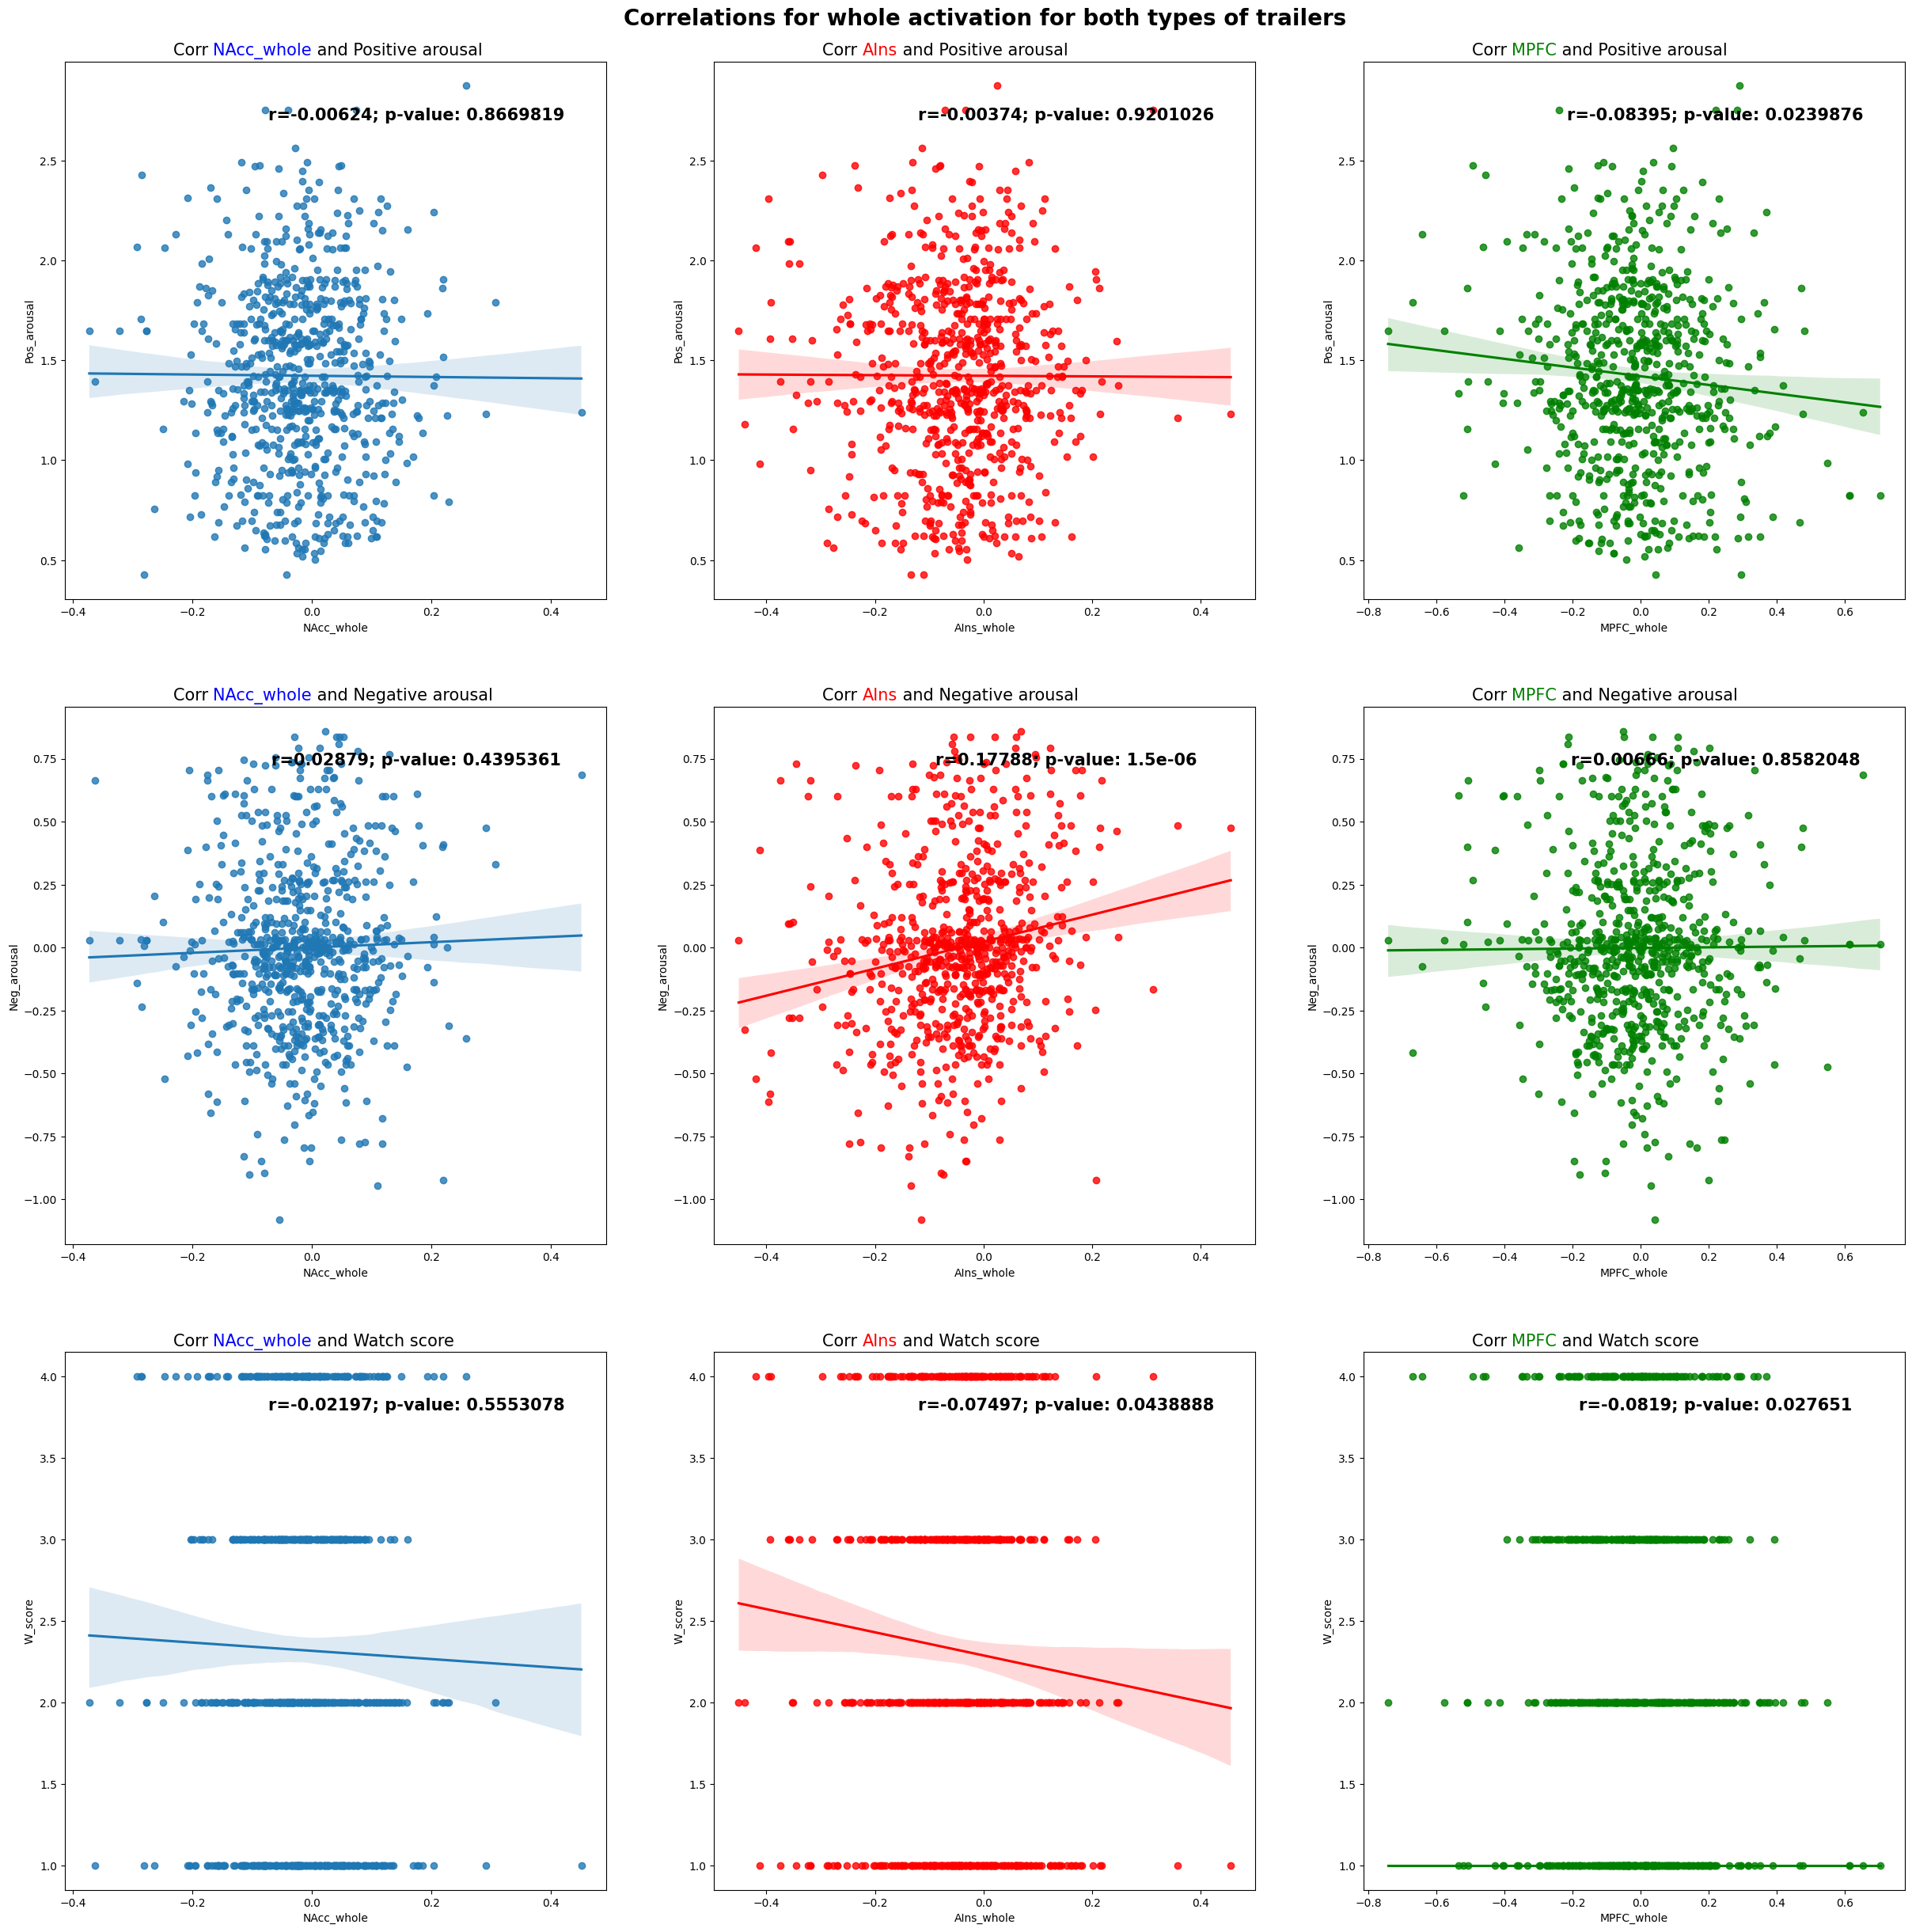

In [77]:
whole_all_corr = [NAcc_PA_whole_All_corr, NAcc_NA_whole_All_corr, NAcc_W_whole_All_corr, AIns_PA_whole_All_corr, AIns_NA_whole_All_corr, AIns_W_whole_All_corr, MPFC_PA_whole_All_corr, MPFC_NA_whole_All_corr, MPFC_W_whole_All_corr]

plot_correlations(all_subs_events_df, whole_all_corr, "whole", "Correlations for whole activation for both types of trailers")

In [78]:
# Whole Neural Activation and PA-NA for Comedy Trailers.
NAcc_PA_whole_C_corr = pearsonr(all_subs_events_comedy["NAcc_whole"], all_subs_events_comedy["Pos_arousal"])
AIns_PA_whole_C_corr = pearsonr(all_subs_events_comedy["AIns_whole"], all_subs_events_comedy["Pos_arousal"])
MPFC_PA_whole_C_corr = pearsonr(all_subs_events_comedy["MPFC_whole"], all_subs_events_comedy["Pos_arousal"])

NAcc_NA_whole_C_corr = pearsonr(all_subs_events_comedy["NAcc_whole"], all_subs_events_comedy["Neg_arousal"])
AIns_NA_whole_C_corr = pearsonr(all_subs_events_comedy["AIns_whole"], all_subs_events_comedy["Neg_arousal"])
MPFC_NA_whole_C_corr = pearsonr(all_subs_events_comedy["MPFC_whole"], all_subs_events_comedy["Neg_arousal"])

NAcc_W_whole_C_corr = pearsonr(all_subs_events_comedy["NAcc_whole"], all_subs_events_comedy["W_score"])
AIns_W_whole_C_corr = pearsonr(all_subs_events_comedy["AIns_whole"], all_subs_events_comedy["W_score"])
MPFC_W_whole_C_corr = pearsonr(all_subs_events_comedy["MPFC_whole"], all_subs_events_comedy["W_score"])

print("For comedy trailers, the correlation between NAcc whole activation and positive arousal is: " + str(round(NAcc_PA_whole_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_whole_C_corr[1])))
print("For comedy trailers, the correlation between AIns whole activation and positive arousal is: " + str(round(AIns_PA_whole_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_whole_C_corr[1])))
print("For comedy trailers, the correlation between MPFC whole activation and positive arousal is: " + str(round(MPFC_PA_whole_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_whole_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc whole activation and negative arousal is: " + str(round(NAcc_NA_whole_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_whole_C_corr[1])))
print("For comedy trailers, the correlation between AIns whole activation and negative arousal is: " + str(round(AIns_NA_whole_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_whole_C_corr[1])))
print("For comedy trailers, the correlation between MPFC whole activation and negative arousal is: " + str(round(MPFC_NA_whole_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_whole_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc whole activation and watch scores is: " + str(round(NAcc_W_whole_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_whole_C_corr[1])))
print("For comedy trailers, the correlation between AIns whole activation and watch scores is: " + str(round(AIns_W_whole_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_whole_C_corr[1])))
print("For comedy trailers, the correlation between MPFC whole activation and watch scores is: " + str(round(MPFC_W_whole_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_whole_C_corr[1])))
      
      

For comedy trailers, the correlation between NAcc whole activation and positive arousal is: -0.05203 with a p-value of: 0.3228728604941013
For comedy trailers, the correlation between AIns whole activation and positive arousal is: -0.03331 with a p-value of: 0.5269186784494827
For comedy trailers, the correlation between MPFC whole activation and positive arousal is: -0.12594 with a p-value of: 0.016360600850211064

For comedy trailers, the correlation between NAcc whole activation and negative arousal is: 0.04143 with a p-value of: 0.4312645042728907
For comedy trailers, the correlation between AIns whole activation and negative arousal is: 0.10255 with a p-value of: 0.050899655719288374
For comedy trailers, the correlation between MPFC whole activation and negative arousal is: 0.02806 with a p-value of: 0.5941681684341523

For comedy trailers, the correlation between NAcc whole activation and watch scores is: -0.0557 with a p-value of: 0.28987247364985524
For comedy trailers, the cor

In [79]:
# Whole Neural Activation and PA-NA for Horror Trailers.
NAcc_PA_whole_H_corr = pearsonr(all_subs_events_horror["NAcc_whole"], all_subs_events_horror["Pos_arousal"])
AIns_PA_whole_H_corr = pearsonr(all_subs_events_horror["AIns_whole"], all_subs_events_horror["Pos_arousal"])
MPFC_PA_whole_H_corr = pearsonr(all_subs_events_horror["MPFC_whole"], all_subs_events_horror["Pos_arousal"])

NAcc_NA_whole_H_corr = pearsonr(all_subs_events_horror["NAcc_whole"], all_subs_events_horror["Neg_arousal"])
AIns_NA_whole_H_corr = pearsonr(all_subs_events_horror["AIns_whole"], all_subs_events_horror["Neg_arousal"])
MPFC_NA_whole_H_corr = pearsonr(all_subs_events_horror["MPFC_whole"], all_subs_events_horror["Neg_arousal"])

NAcc_W_whole_H_corr = pearsonr(all_subs_events_horror["NAcc_whole"], all_subs_events_horror["W_score"])
AIns_W_whole_H_corr = pearsonr(all_subs_events_horror["AIns_whole"], all_subs_events_horror["W_score"])
MPFC_W_whole_H_corr = pearsonr(all_subs_events_horror["MPFC_whole"], all_subs_events_horror["W_score"])

print("For horror trailers, the correlation between NAcc whole activation and positive arousal is: " + str(round(NAcc_PA_whole_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_whole_H_corr[1])))
print("For horror trailers, the correlation between AIns whole activation and positive arousal is: " + str(round(AIns_PA_whole_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_whole_H_corr[1])))
print("For horror trailers, the correlation between MPFC whole activation and positive arousal is: " + str(round(MPFC_PA_whole_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_whole_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc whole activation and negative arousal is: " + str(round(NAcc_NA_whole_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_whole_H_corr[1])))
print("For horror trailers, the correlation between AIns whole activation and negative arousal is: " + str(round(AIns_NA_whole_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_whole_H_corr[1])))
print("For horror trailers, the correlation between MPFC whole activation and negative arousal is: " + str(round(MPFC_NA_whole_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_whole_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc whole activation and watch scores is: " + str(round(NAcc_W_whole_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_whole_H_corr[1])))
print("For horror trailers, the correlation between AIns whole activation and watch scores is: " + str(round(AIns_W_whole_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_whole_H_corr[1])))
print("For horror trailers, the correlation between MPFC whole activation and watch scores is: " + str(round(MPFC_W_whole_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_whole_H_corr[1])))



For horror trailers, the correlation between NAcc whole activation and positive arousal is: 0.04353 with a p-value of: 0.4102785048874748
For horror trailers, the correlation between AIns whole activation and positive arousal is: 0.02248 with a p-value of: 0.6707988766439795
For horror trailers, the correlation between MPFC whole activation and positive arousal is: -0.03296 with a p-value of: 0.5330101656502245

For horror trailers, the correlation between NAcc whole activation and negative arousal is: 0.03282 with a p-value of: 0.5348329021324519
For horror trailers, the correlation between AIns whole activation and negative arousal is: 0.06851 with a p-value of: 0.19464919441292305
For horror trailers, the correlation between MPFC whole activation and negative arousal is: 0.01044 with a p-value of: 0.8435719676685811

For horror trailers, the correlation between NAcc whole activation and watch scores is: 0.00423 with a p-value of: 0.9362717635601819
For horror trailers, the correlati

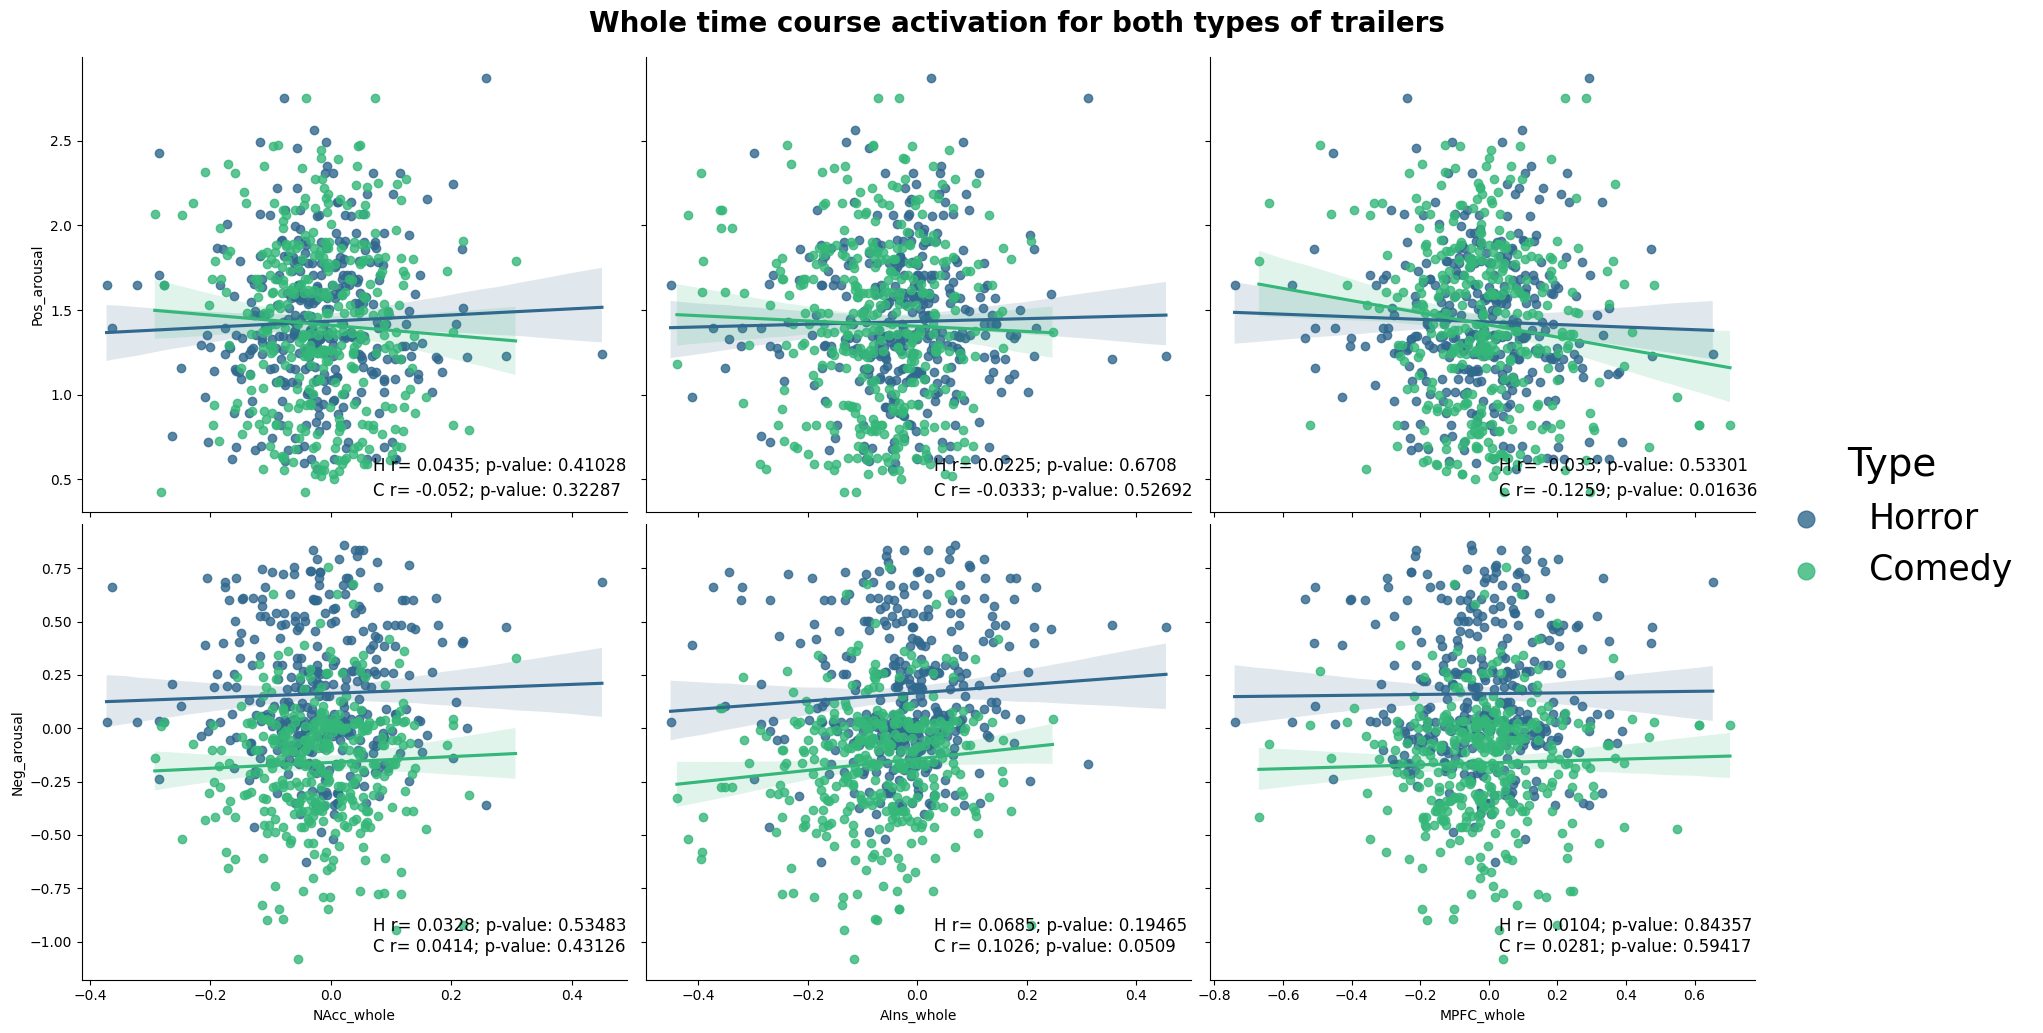

In [80]:
whole_comedy_corr = [NAcc_PA_whole_C_corr, NAcc_NA_whole_C_corr, NAcc_W_whole_C_corr, AIns_PA_whole_C_corr, AIns_NA_whole_C_corr, AIns_W_whole_C_corr, MPFC_PA_whole_C_corr, MPFC_NA_whole_C_corr, MPFC_W_whole_C_corr]
whole_horror_corr = [NAcc_PA_whole_H_corr, NAcc_NA_whole_H_corr, NAcc_W_whole_H_corr, AIns_PA_whole_H_corr, AIns_NA_whole_H_corr, AIns_W_whole_H_corr, MPFC_PA_whole_H_corr, MPFC_NA_whole_H_corr, MPFC_W_whole_H_corr]

title_whole = 'Whole time course activation for both types of trailers'
plot_correlations_bothTrailers(all_subs_events_df, "whole" ,whole_comedy_corr, whole_horror_corr, title_whole)

## Neural Activation Offset 

In [81]:
# Correlation with Positive Arousal. 
NAcc_PA_Off_All_corr = pearsonr(all_subs_events_df["NAcc_offset"], all_subs_events_df["Pos_arousal"])
AIns_PA_Off_All_corr = pearsonr(all_subs_events_df["AIns_offset"], all_subs_events_df["Pos_arousal"])
MPFC_PA_Off_All_corr = pearsonr(all_subs_events_df["MPFC_offset"], all_subs_events_df["Pos_arousal"])

# Correlation with Negative Arousal.
NAcc_NA_Off_All_corr = pearsonr(all_subs_events_df["NAcc_offset"], all_subs_events_df["Neg_arousal"])
AIns_NA_Off_All_corr = pearsonr(all_subs_events_df["AIns_offset"], all_subs_events_df["Neg_arousal"])
MPFC_NA_Off_All_corr = pearsonr(all_subs_events_df["MPFC_offset"], all_subs_events_df["Neg_arousal"])

# Correlation with Watch Scores.
NAcc_W_Off_All_corr = pearsonr(all_subs_events_df["NAcc_offset"], all_subs_events_df["W_score"])
AIns_W_Off_All_corr = pearsonr(all_subs_events_df["AIns_offset"], all_subs_events_df["W_score"])
MPFC_W_Off_All_corr = pearsonr(all_subs_events_df["MPFC_offset"], all_subs_events_df["W_score"])

print("For both types of trailers, the correlation between NAcc offset activation and positive arousal is: " + str(round(NAcc_PA_Off_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_Off_All_corr[1])))
print("For both types of trailers, the correlation between AIns offset activation and positive arousal is: " + str(round(AIns_PA_Off_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_Off_All_corr[1])))
print("For both types of trailers, the correlation between MPFC offset activation and positive arousal is: " + str(round(MPFC_PA_Off_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_Off_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc offset activation and negative arousal is: " + str(round(NAcc_NA_Off_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_Off_All_corr[1])))
print("For both types of trailers, the correlation between AIns offset activation and negative arousal is: " + str(round(AIns_NA_Off_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_Off_All_corr[1])))
print("For both types of trailers, the correlation between MPFC offset activation and negative arousal is: " + str(round(MPFC_NA_Off_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_Off_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc offset activation and watch scores is: " + str(round(NAcc_W_Off_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_Off_All_corr[1])))
print("For both types of trailers, the correlation between AIns offset activation and watch scores is: " + str(round(AIns_W_Off_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_Off_All_corr[1])))
print("For both types of trailers, the correlation between MPFC offset activation and watch scores is: " + str(round(MPFC_W_Off_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_Off_All_corr[1])))

For both types of trailers, the correlation between NAcc offset activation and positive arousal is: 0.00111 with a p-value of: 0.9761881375831732
For both types of trailers, the correlation between AIns offset activation and positive arousal is: 0.01355 with a p-value of: 0.7161488231755291
For both types of trailers, the correlation between MPFC offset activation and positive arousal is: -0.03681 with a p-value of: 0.32296595403803097

For both types of trailers, the correlation between NAcc offset activation and negative arousal is: 0.02898 with a p-value of: 0.43661424044409686
For both types of trailers, the correlation between AIns offset activation and negative arousal is: 0.19623 with a p-value of: 1.0427129142240966e-07
For both types of trailers, the correlation between MPFC offset activation and negative arousal is: 0.05801 with a p-value of: 0.11910793476610369

For both types of trailers, the correlation between NAcc offset activation and watch scores is: -0.01258 with a p-

/Users/luisalvarez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


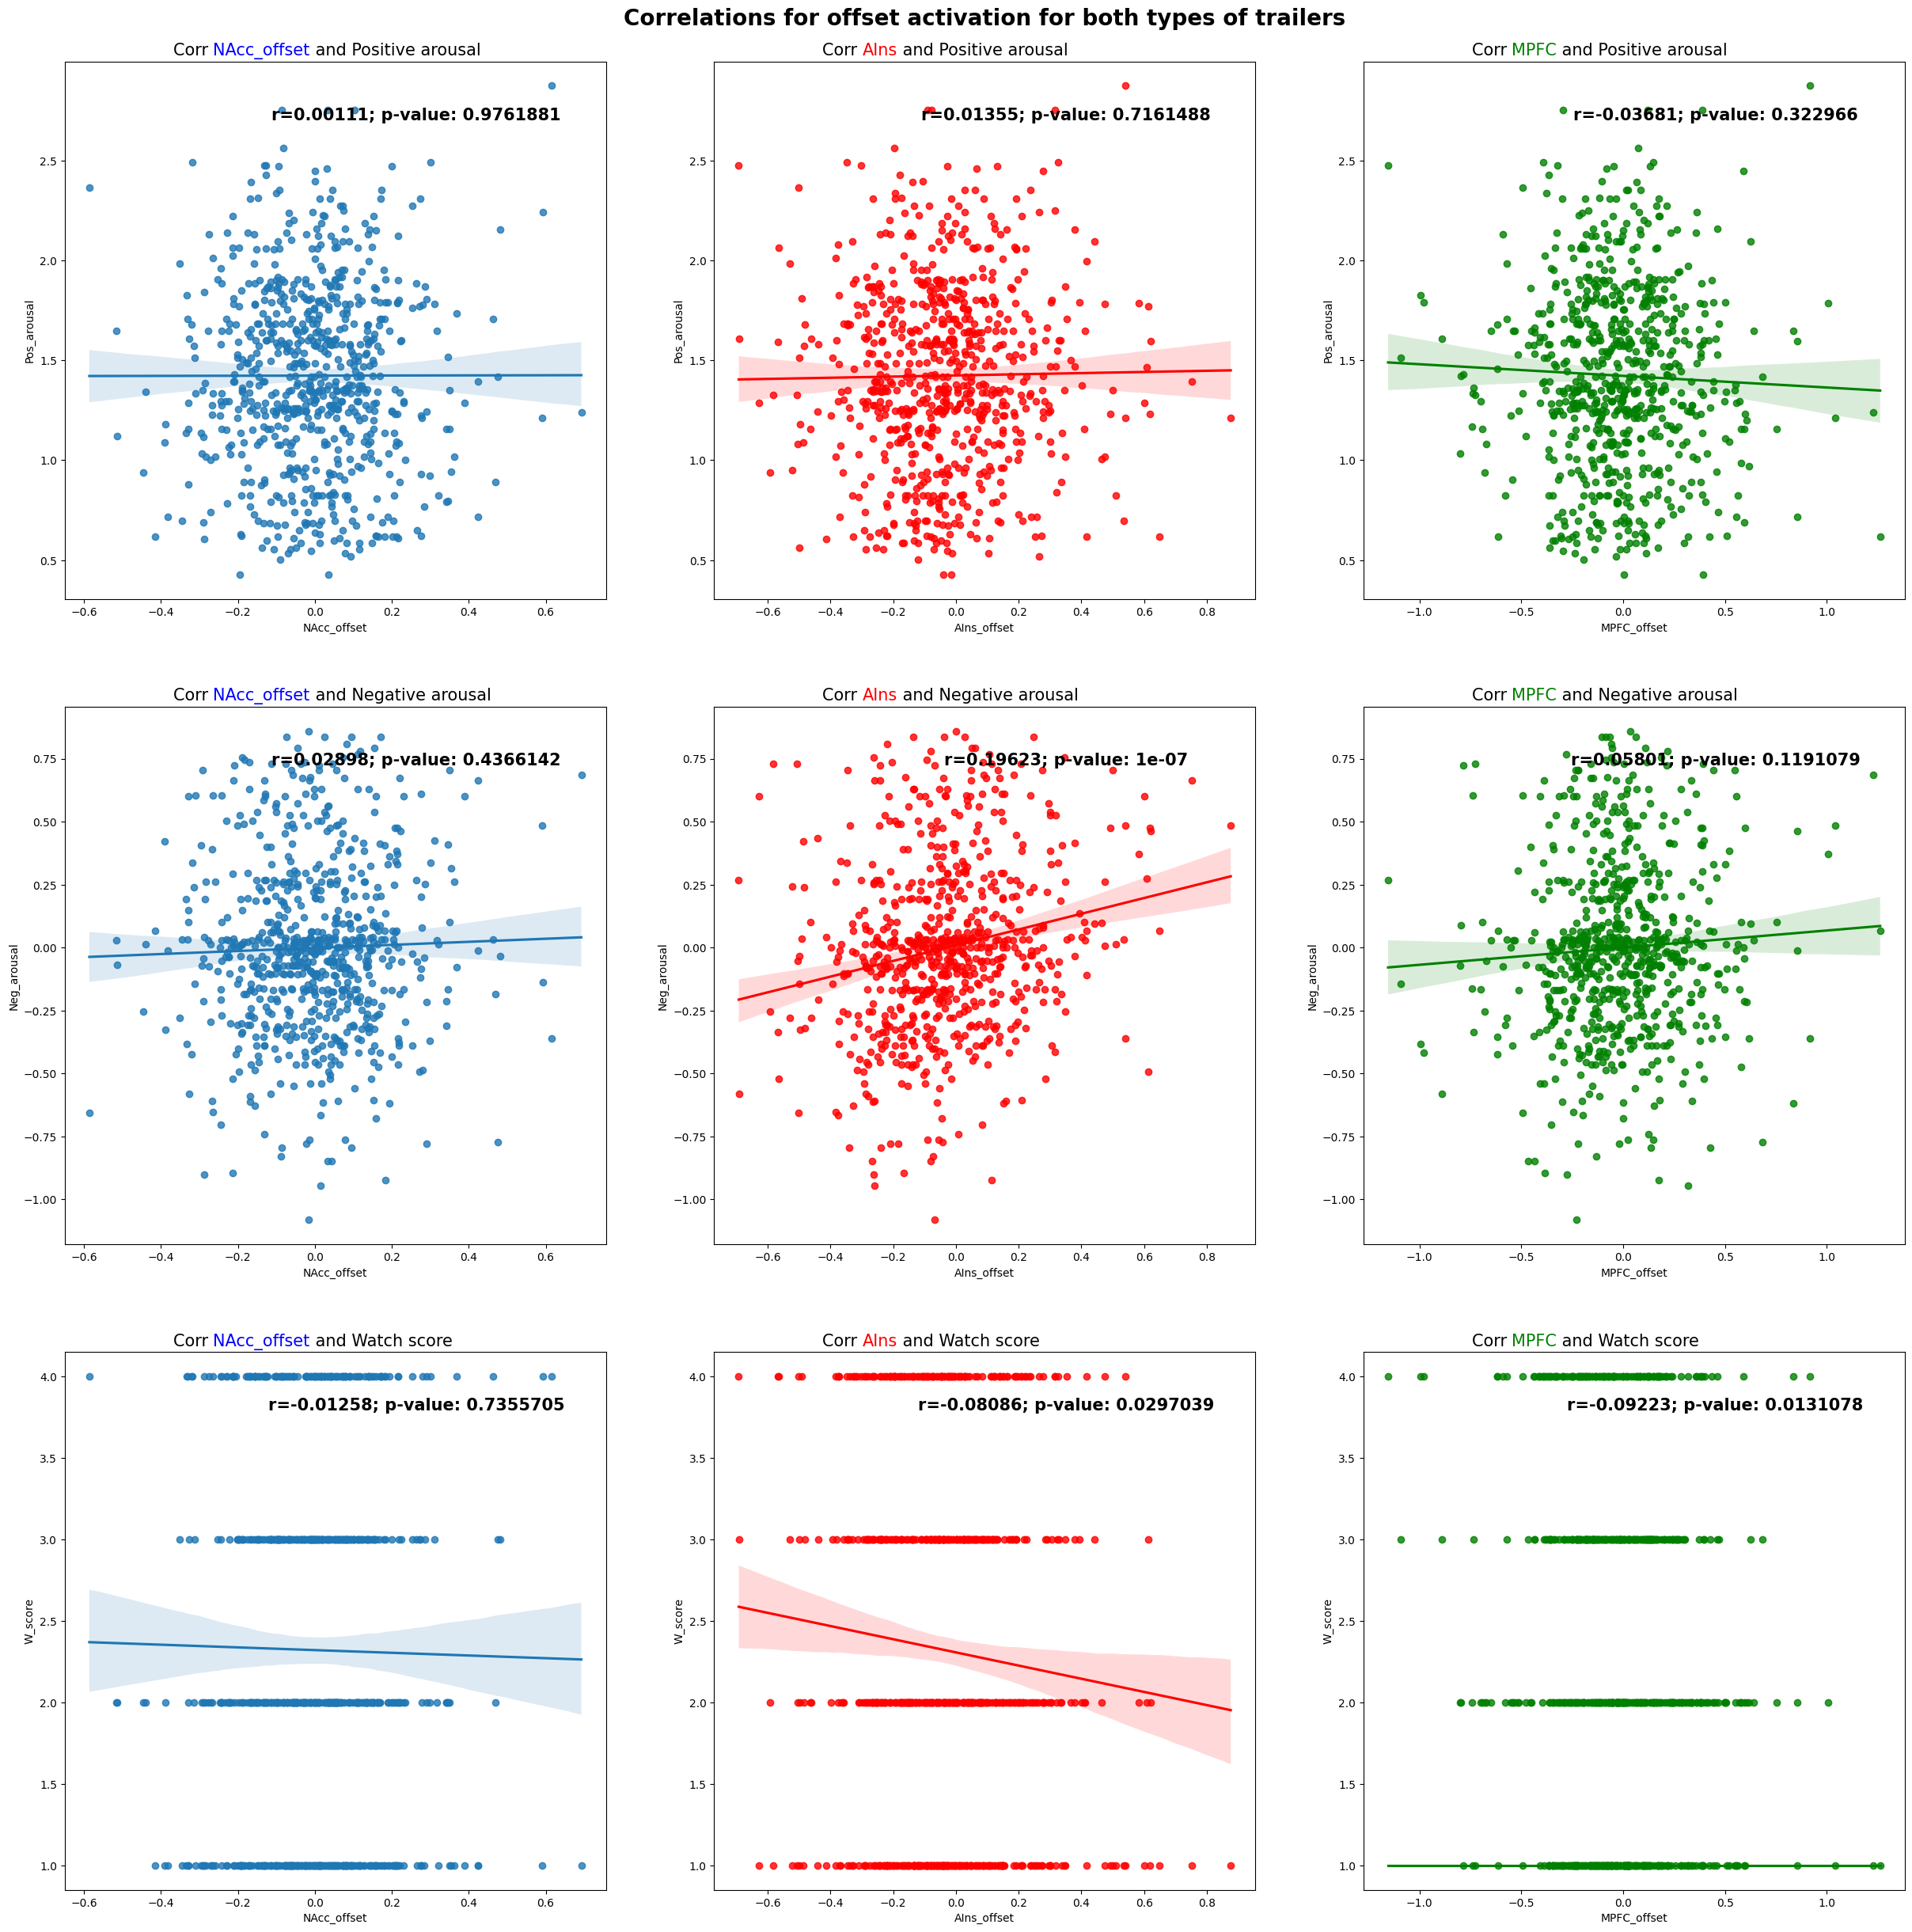

In [82]:
offset_all_corr = [NAcc_PA_Off_All_corr, NAcc_NA_Off_All_corr, NAcc_W_Off_All_corr, AIns_PA_Off_All_corr, AIns_NA_Off_All_corr, AIns_W_Off_All_corr, MPFC_PA_Off_All_corr, MPFC_NA_Off_All_corr, MPFC_W_Off_All_corr]
plot_correlations(all_subs_events_df, offset_all_corr, "offset", "Correlations for offset activation for both types of trailers")

In [83]:
# Offset Neural Activation and PA-NA for Comedy Trailers.
NAcc_PA_Off_C_corr = pearsonr(all_subs_events_comedy["NAcc_offset"], all_subs_events_comedy["Pos_arousal"])
AIns_PA_Off_C_corr = pearsonr(all_subs_events_comedy["AIns_offset"], all_subs_events_comedy["Pos_arousal"])
MPFC_PA_Off_C_corr = pearsonr(all_subs_events_comedy["MPFC_offset"], all_subs_events_comedy["Pos_arousal"])

NAcc_NA_Off_C_corr = pearsonr(all_subs_events_comedy["NAcc_offset"], all_subs_events_comedy["Neg_arousal"])
AIns_NA_Off_C_corr = pearsonr(all_subs_events_comedy["AIns_offset"], all_subs_events_comedy["Neg_arousal"])
MPFC_NA_Off_C_corr = pearsonr(all_subs_events_comedy["MPFC_offset"], all_subs_events_comedy["Neg_arousal"])

NAcc_W_Off_C_corr = pearsonr(all_subs_events_comedy["NAcc_offset"], all_subs_events_comedy["W_score"])
AIns_W_Off_C_corr = pearsonr(all_subs_events_comedy["AIns_offset"], all_subs_events_comedy["W_score"])
MPFC_W_Off_C_corr = pearsonr(all_subs_events_comedy["MPFC_offset"], all_subs_events_comedy["W_score"])

print("For comedy trailers, the correlation between NAcc offset activation and positive arousal is: " + str(round(NAcc_PA_Off_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_Off_C_corr[1])))
print("For comedy trailers, the correlation between AIns offset activation and positive arousal is: " + str(round(AIns_PA_Off_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_Off_C_corr[1])))
print("For comedy trailers, the correlation between MPFC offset activation and positive arousal is: " + str(round(MPFC_PA_Off_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_Off_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc offset activation and negative arousal is: " + str(round(NAcc_NA_Off_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_Off_C_corr[1])))
print("For comedy trailers, the correlation between AIns offset activation and negative arousal is: " + str(round(AIns_NA_Off_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_Off_C_corr[1])))
print("For comedy trailers, the correlation between MPFC offset activation and negative arousal is: " + str(round(MPFC_NA_Off_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_Off_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc offset activation and watch scores is: " + str(round(NAcc_W_Off_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_Off_C_corr[1])))
print("For comedy trailers, the correlation between AIns offset activation and watch scores is: " + str(round(AIns_W_Off_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_Off_C_corr[1])))
print("For comedy trailers, the correlation between MPFC offset activation and watch scores is: " + str(round(MPFC_W_Off_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_Off_C_corr[1])))
      

For comedy trailers, the correlation between NAcc offset activation and positive arousal is: -0.11853 with a p-value of: 0.023921429263644507
For comedy trailers, the correlation between AIns offset activation and positive arousal is: -0.06776 with a p-value of: 0.1977238014873202
For comedy trailers, the correlation between MPFC offset activation and positive arousal is: -0.09219 with a p-value of: 0.07941820461449225

For comedy trailers, the correlation between NAcc offset activation and negative arousal is: 0.02736 with a p-value of: 0.6033048489182858
For comedy trailers, the correlation between AIns offset activation and negative arousal is: 0.11153 with a p-value of: 0.0336499550056628
For comedy trailers, the correlation between MPFC offset activation and negative arousal is: 0.05699 with a p-value of: 0.27879813740147846

For comedy trailers, the correlation between NAcc offset activation and watch scores is: -0.10747 with a p-value of: 0.04071987997575904
For comedy trailers,

In [84]:
# Offset Neural Activation and PA-NA for Horror Trailers.
NAcc_PA_Off_H_corr = pearsonr(all_subs_events_horror["NAcc_offset"], all_subs_events_horror["Pos_arousal"])
AIns_PA_Off_H_corr = pearsonr(all_subs_events_horror["AIns_offset"], all_subs_events_horror["Pos_arousal"])
MPFC_PA_Off_H_corr = pearsonr(all_subs_events_horror["MPFC_offset"], all_subs_events_horror["Pos_arousal"])

NAcc_NA_Off_H_corr = pearsonr(all_subs_events_horror["NAcc_offset"], all_subs_events_horror["Neg_arousal"])
AIns_NA_Off_H_corr = pearsonr(all_subs_events_horror["AIns_offset"], all_subs_events_horror["Neg_arousal"])
MPFC_NA_Off_H_corr = pearsonr(all_subs_events_horror["MPFC_offset"], all_subs_events_horror["Neg_arousal"])

NAcc_W_Off_H_corr = pearsonr(all_subs_events_horror["NAcc_offset"], all_subs_events_horror["W_score"])
AIns_W_Off_H_corr = pearsonr(all_subs_events_horror["AIns_offset"], all_subs_events_horror["W_score"])
MPFC_W_Off_H_corr = pearsonr(all_subs_events_horror["MPFC_offset"], all_subs_events_horror["W_score"])

print("For horror trailers, the correlation between NAcc offset activation and positive arousal is: " + str(round(NAcc_PA_Off_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_Off_H_corr[1])))
print("For horror trailers, the correlation between AIns offset activation and positive arousal is: " + str(round(AIns_PA_Off_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_Off_H_corr[1])))
print("For horror trailers, the correlation between MPFC offset activation and positive arousal is: " + str(round(MPFC_PA_Off_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_Off_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc offset activation and negative arousal is: " + str(round(NAcc_NA_Off_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_Off_H_corr[1])))
print("For horror trailers, the correlation between AIns offset activation and negative arousal is: " + str(round(AIns_NA_Off_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_Off_H_corr[1])))
print("For horror trailers, the correlation between MPFC offset activation and negative arousal is: " + str(round(MPFC_NA_Off_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_Off_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc offset activation and watch scores is: " + str(round(NAcc_W_Off_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_Off_H_corr[1])))
print("For horror trailers, the correlation between AIns offset activation and watch scores is: " + str(round(AIns_W_Off_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_Off_H_corr[1])))
print("For horror trailers, the correlation between MPFC offset activation and watch scores is: " + str(round(MPFC_W_Off_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_Off_H_corr[1])))

For horror trailers, the correlation between NAcc offset activation and positive arousal is: 0.13398 with a p-value of: 0.010938083360351153
For horror trailers, the correlation between AIns offset activation and positive arousal is: 0.09518 with a p-value of: 0.07128229429934758
For horror trailers, the correlation between MPFC offset activation and positive arousal is: 0.02632 with a p-value of: 0.618709006144425

For horror trailers, the correlation between NAcc offset activation and negative arousal is: 0.03212 with a p-value of: 0.5434937362872161
For horror trailers, the correlation between AIns offset activation and negative arousal is: 0.12855 with a p-value of: 0.014658303499002849
For horror trailers, the correlation between MPFC offset activation and negative arousal is: 0.0399 with a p-value of: 0.45042609786185067

For horror trailers, the correlation between NAcc offset activation and watch scores is: 0.075 with a p-value of: 0.15560050786170915
For horror trailers, the c

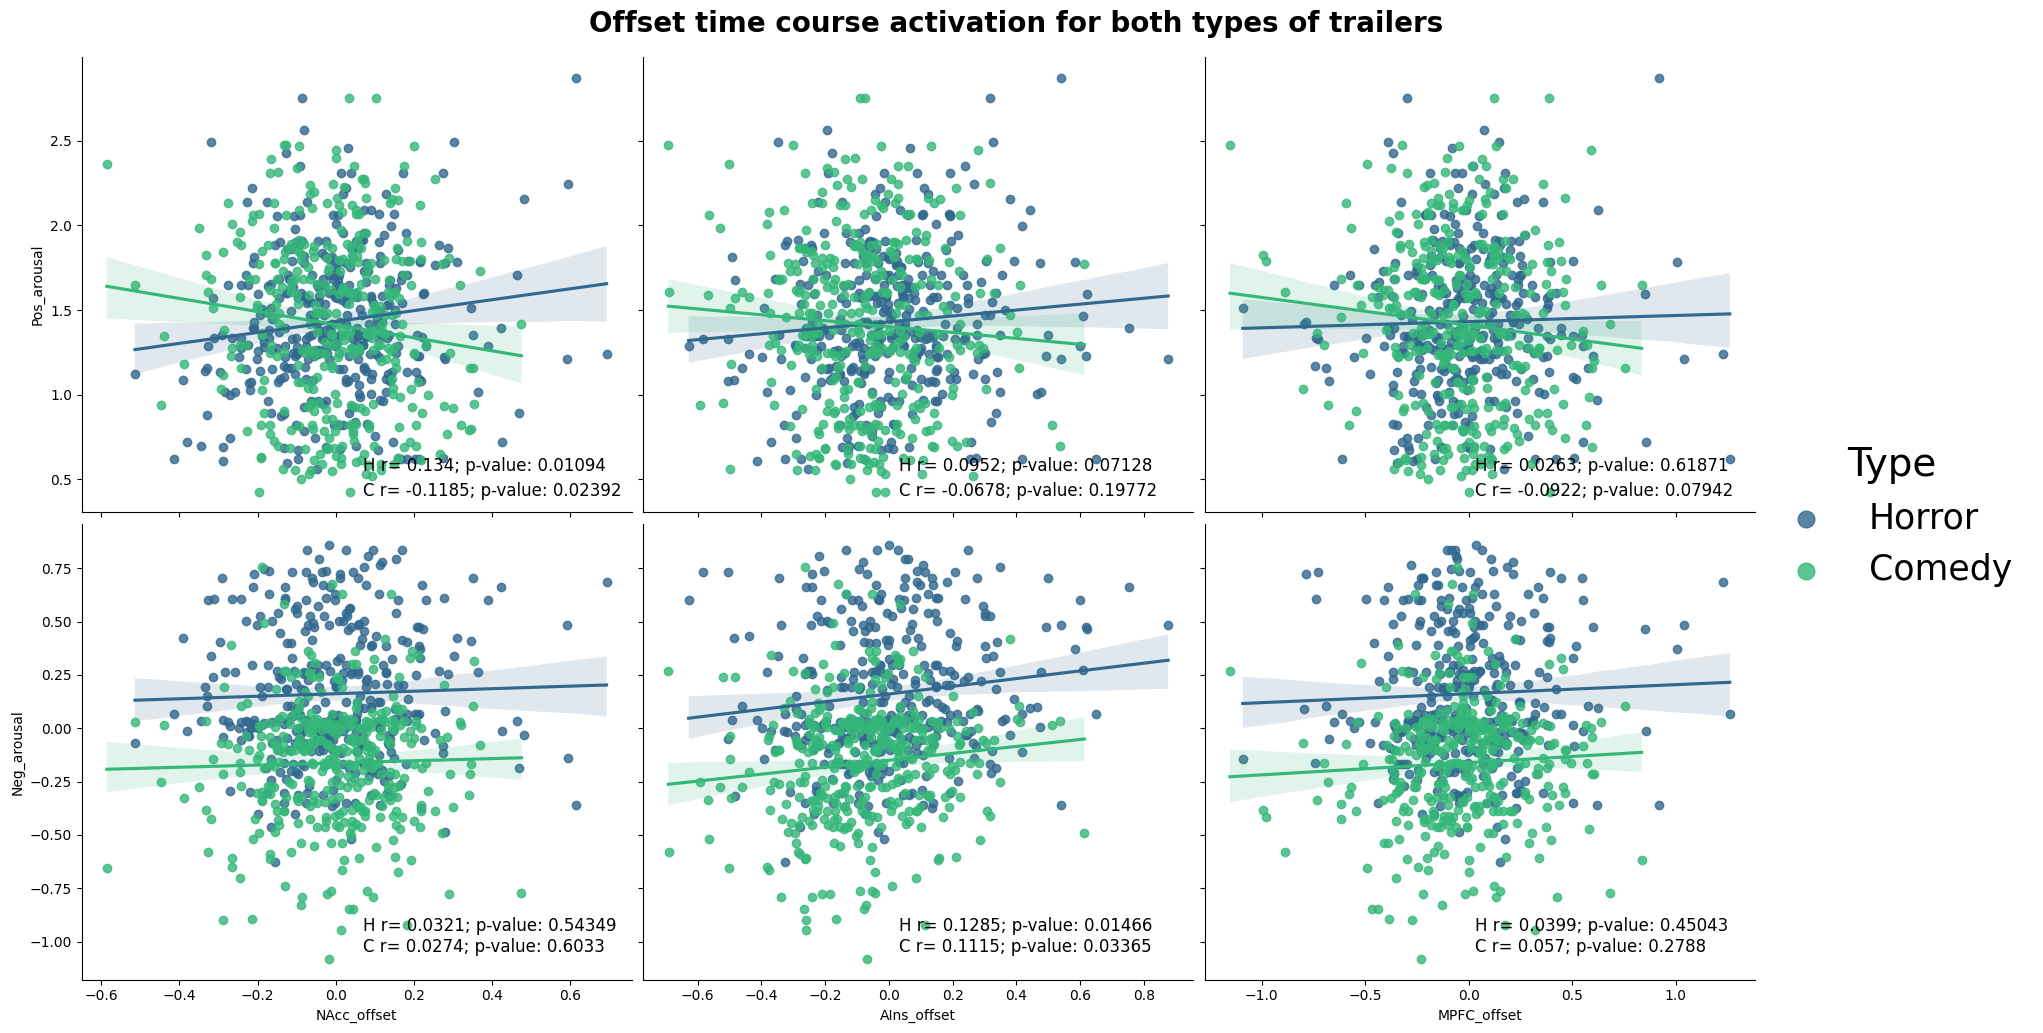

In [85]:
offset_horror_corr = [NAcc_PA_Off_H_corr, NAcc_NA_Off_H_corr, NAcc_W_Off_H_corr, AIns_PA_Off_H_corr, AIns_NA_Off_H_corr, AIns_W_Off_H_corr, MPFC_PA_Off_H_corr, MPFC_NA_Off_H_corr, MPFC_W_Off_H_corr]
offset_comedy_corr = [NAcc_PA_Off_C_corr, NAcc_NA_Off_C_corr, NAcc_W_Off_C_corr, AIns_PA_Off_C_corr, AIns_NA_Off_C_corr, AIns_W_Off_C_corr, MPFC_PA_Off_C_corr, MPFC_NA_Off_C_corr, MPFC_W_Off_C_corr]

title_offset = 'Offset time course activation for both types of trailers'
plot_correlations_bothTrailers(all_subs_events_df, "offset", offset_comedy_corr, offset_horror_corr, title_offset)


## Neural activation onset

In [86]:
# Correlation with Positive Arousal.
NAcc_PA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Pos_arousal"])
AIns_PA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Pos_arousal"])
MPFC_PA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Pos_arousal"])

# Correlation with Negative Arousal.
NAcc_NA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Neg_arousal"])
AIns_NA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Neg_arousal"])
MPFC_NA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Neg_arousal"])

# Correlation with Watch Scores.
NAcc_W_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["W_score"])
AIns_W_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["W_score"])
MPFC_W_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["W_score"])

print("For both types of trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_All_corr[1])))
print("For both types of trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_All_corr[1])))
print("For both types of trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_All_corr[1])))
print("For both types of trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_All_corr[1])))
print("For both types of trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_All_corr[1])))
print("For both types of trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_All_corr[1])))
print("For both types of trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_All_corr[1])))

For both types of trailers, the correlation between NAcc onset activation and positive arousal is: 0.00106 with a p-value of: 0.9773266501440562
For both types of trailers, the correlation between AIns onset activation and positive arousal is: 0.00241 with a p-value of: 0.9485224010655583
For both types of trailers, the correlation between MPFC onset activation and positive arousal is: 0.01275 with a p-value of: 0.7320709657377998

For both types of trailers, the correlation between NAcc onset activation and negative arousal is: -0.02629 with a p-value of: 0.48033235561681653
For both types of trailers, the correlation between AIns onset activation and negative arousal is: -0.00292 with a p-value of: 0.9374249921294668
For both types of trailers, the correlation between MPFC onset activation and negative arousal is: -0.03439 with a p-value of: 0.3557541068431482

For both types of trailers, the correlation between NAcc onset activation and watch scores is: 0.01479 with a p-value of: 0.

/Users/luisalvarez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


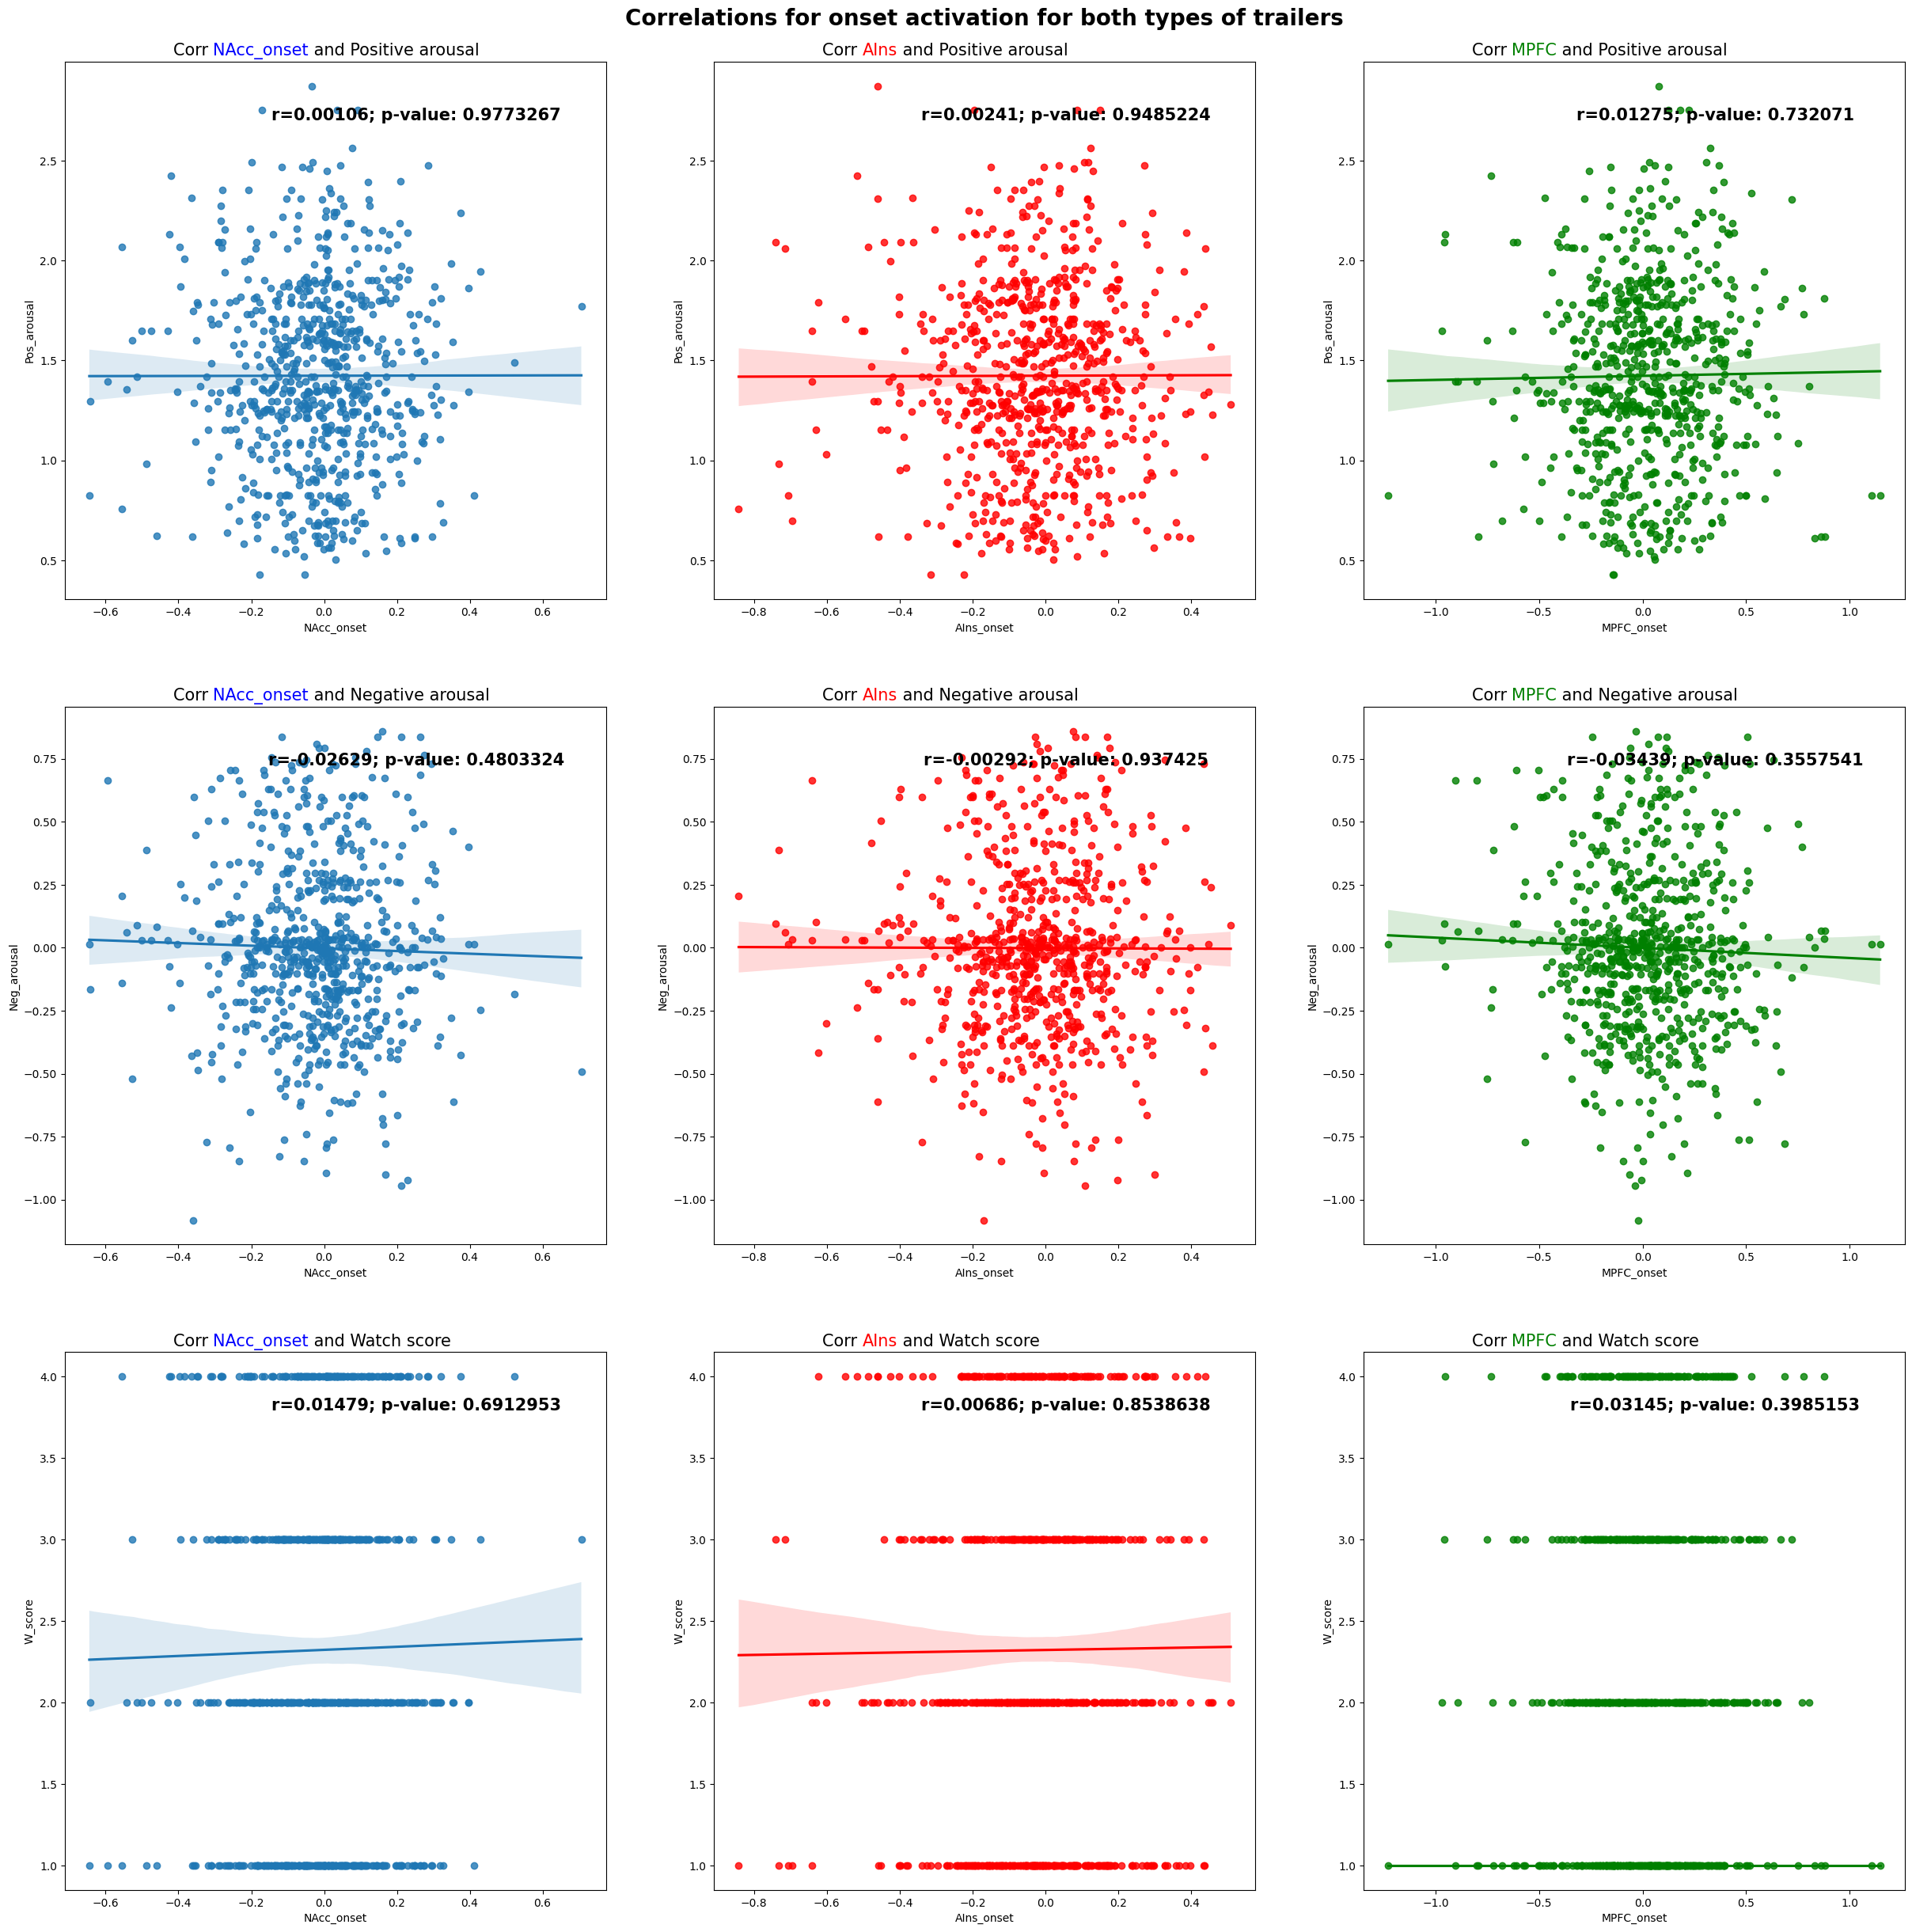

In [87]:
On_all_corr = [NAcc_PA_On_All_corr, NAcc_NA_On_All_corr, NAcc_W_On_All_corr, AIns_PA_On_All_corr, AIns_NA_On_All_corr, AIns_W_On_All_corr, MPFC_PA_On_All_corr, MPFC_NA_On_All_corr, MPFC_W_On_All_corr]
plot_correlations(all_subs_events_df, On_all_corr, "onset", "Correlations for onset activation for both types of trailers")

In [88]:
# Onset Neural Activation and PA-NA for Comedy Trailers.
NAcc_PA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Pos_arousal"])
AIns_PA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Pos_arousal"])
MPFC_PA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Pos_arousal"])

NAcc_NA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Neg_arousal"])
AIns_NA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Neg_arousal"])
MPFC_NA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Neg_arousal"])

NAcc_W_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["W_score"])
AIns_W_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["W_score"])
MPFC_W_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["W_score"])

print("For comedy trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_C_corr[1])))
print("For comedy trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_C_corr[1])))
print("For comedy trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_C_corr[1])))
print("For comedy trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_C_corr[1])))
print("For comedy trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_C_corr[1])))
print("For comedy trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_C_corr[1])))
print("For comedy trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_C_corr[1])))

For comedy trailers, the correlation between NAcc onset activation and positive arousal is: 0.05305 with a p-value of: 0.3134512452669006
For comedy trailers, the correlation between AIns onset activation and positive arousal is: 0.03409 with a p-value of: 0.5172952203533508
For comedy trailers, the correlation between MPFC onset activation and positive arousal is: -0.015 with a p-value of: 0.7757715615876845

For comedy trailers, the correlation between NAcc onset activation and negative arousal is: 0.02078 with a p-value of: 0.6931520200170579
For comedy trailers, the correlation between AIns onset activation and negative arousal is: -0.00163 with a p-value of: 0.9752814131804232
For comedy trailers, the correlation between MPFC onset activation and negative arousal is: 0.02973 with a p-value of: 0.5722914570385789

For comedy trailers, the correlation between NAcc onset activation and watch scores is: 0.02833 with a p-value of: 0.5906260085935363
For comedy trailers, the correlation

In [89]:
# Onset Neural Activation and PA-NA for Horror Trailers.
NAcc_PA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Pos_arousal"])
AIns_PA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Pos_arousal"])
MPFC_PA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Pos_arousal"])

NAcc_NA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Neg_arousal"])
AIns_NA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Neg_arousal"])
MPFC_NA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Neg_arousal"])

NAcc_W_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["W_score"])
AIns_W_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["W_score"])
MPFC_W_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["W_score"])

print("For horror trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_H_corr[1])))
print("For horror trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_H_corr[1])))
print("For horror trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_H_corr[1])))
print("For horror trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_H_corr[1])))
print("For horror trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_H_corr[1])))
print("For horror trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_H_corr[1])))
print("For horror trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_H_corr[1])))

For horror trailers, the correlation between NAcc onset activation and positive arousal is: -0.05929 with a p-value of: 0.2618355420010685
For horror trailers, the correlation between AIns onset activation and positive arousal is: -0.03457 with a p-value of: 0.5131898117013624
For horror trailers, the correlation between MPFC onset activation and positive arousal is: 0.04914 with a p-value of: 0.35252536174020943

For horror trailers, the correlation between NAcc onset activation and negative arousal is: -0.0423 with a p-value of: 0.4235748411015432
For horror trailers, the correlation between AIns onset activation and negative arousal is: -0.01958 with a p-value of: 0.7112585554064202
For horror trailers, the correlation between MPFC onset activation and negative arousal is: -0.03013 with a p-value of: 0.5687458528033223

For horror trailers, the correlation between NAcc onset activation and watch scores is: -0.01 with a p-value of: 0.8499733410016717
For horror trailers, the correlat

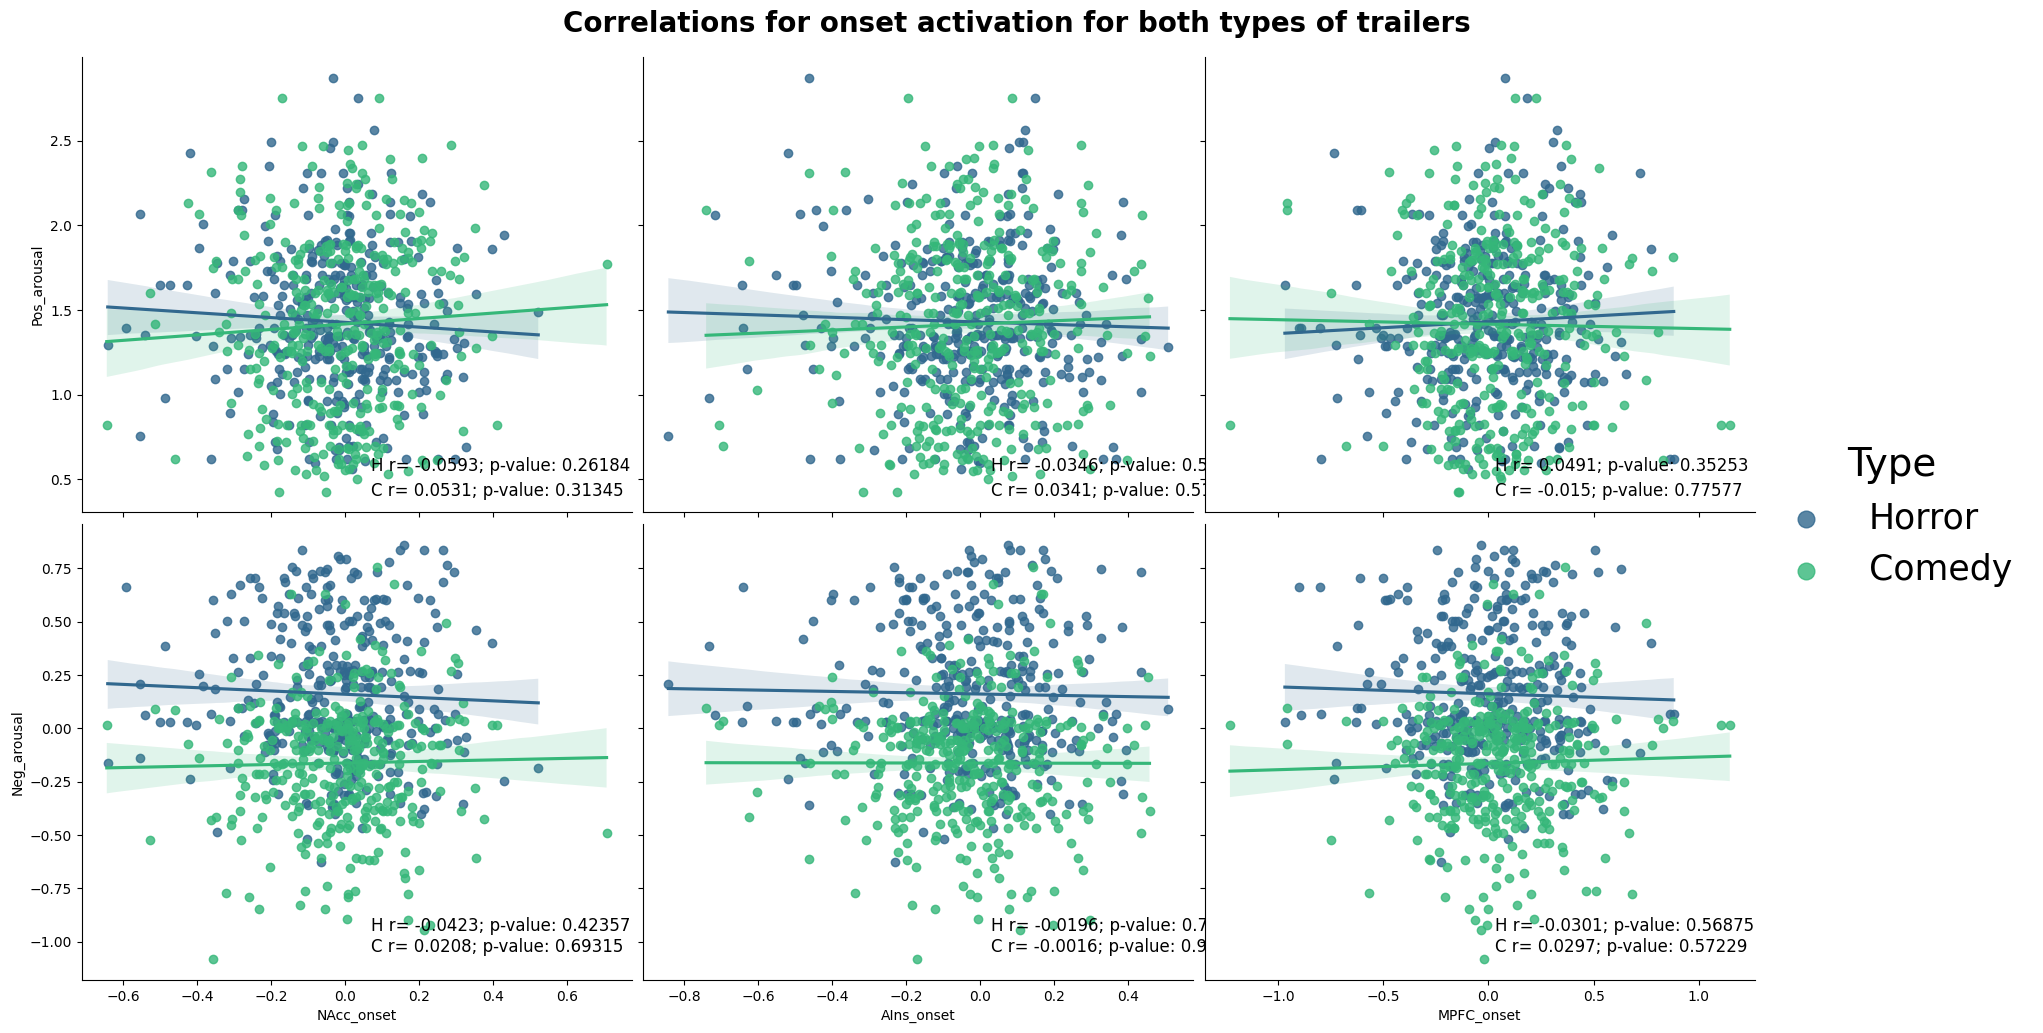

In [90]:
On_horror_corr = [NAcc_PA_On_H_corr, NAcc_NA_On_H_corr, NAcc_W_On_H_corr, AIns_PA_On_H_corr, AIns_NA_On_H_corr, AIns_W_On_H_corr, MPFC_PA_On_H_corr, MPFC_NA_On_H_corr, MPFC_W_On_H_corr]
On_comedy_corr = [NAcc_PA_On_C_corr, NAcc_NA_On_C_corr, NAcc_W_On_C_corr, AIns_PA_On_C_corr, AIns_NA_On_C_corr, AIns_W_On_C_corr, MPFC_PA_On_C_corr, MPFC_NA_On_C_corr, MPFC_W_On_C_corr]
plot_correlations_bothTrailers(all_subs_events_df, "onset", On_comedy_corr, On_horror_corr, "Correlations for onset activation for both types of trailers")



## Neural ISC

In [91]:
# Correlation with Positive Arousal.
NAcc_PA_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["Pos_arousal"])
AIns_PA_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["Pos_arousal"])
MPFC_PA_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["Pos_arousal"])

# Correlation with Negative Arousal.
NAcc_NA_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["Neg_arousal"])
AIns_NA_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["Neg_arousal"])
MPFC_NA_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["Neg_arousal"])

# Correlation with Watch Scores.
NAcc_W_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["W_score"])
AIns_W_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["W_score"])
MPFC_W_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["W_score"])

print("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_All_corr[1])))


For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: 0.06107 with a p-value of: 0.10083220213204654
For both types of trailers, the correlation between AIns ISC activation and positive arousal is: 0.04477 with a p-value of: 0.22925351959900392
For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: 0.11497 with a p-value of: 0.001959607339122977

For both types of trailers, the correlation between NAcc ISC activation and negative arousal is: -0.04179 with a p-value of: 0.26177858013434996
For both types of trailers, the correlation between AIns ISC activation and negative arousal is: -0.04507 with a p-value of: 0.22615805543671147
For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: -0.05044 with a p-value of: 0.17545550057774928

For both types of trailers, the correlation between NAcc ISC activation and watch scores is: 0.06025 with a p-value of: 0.10550486

/Users/luisalvarez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


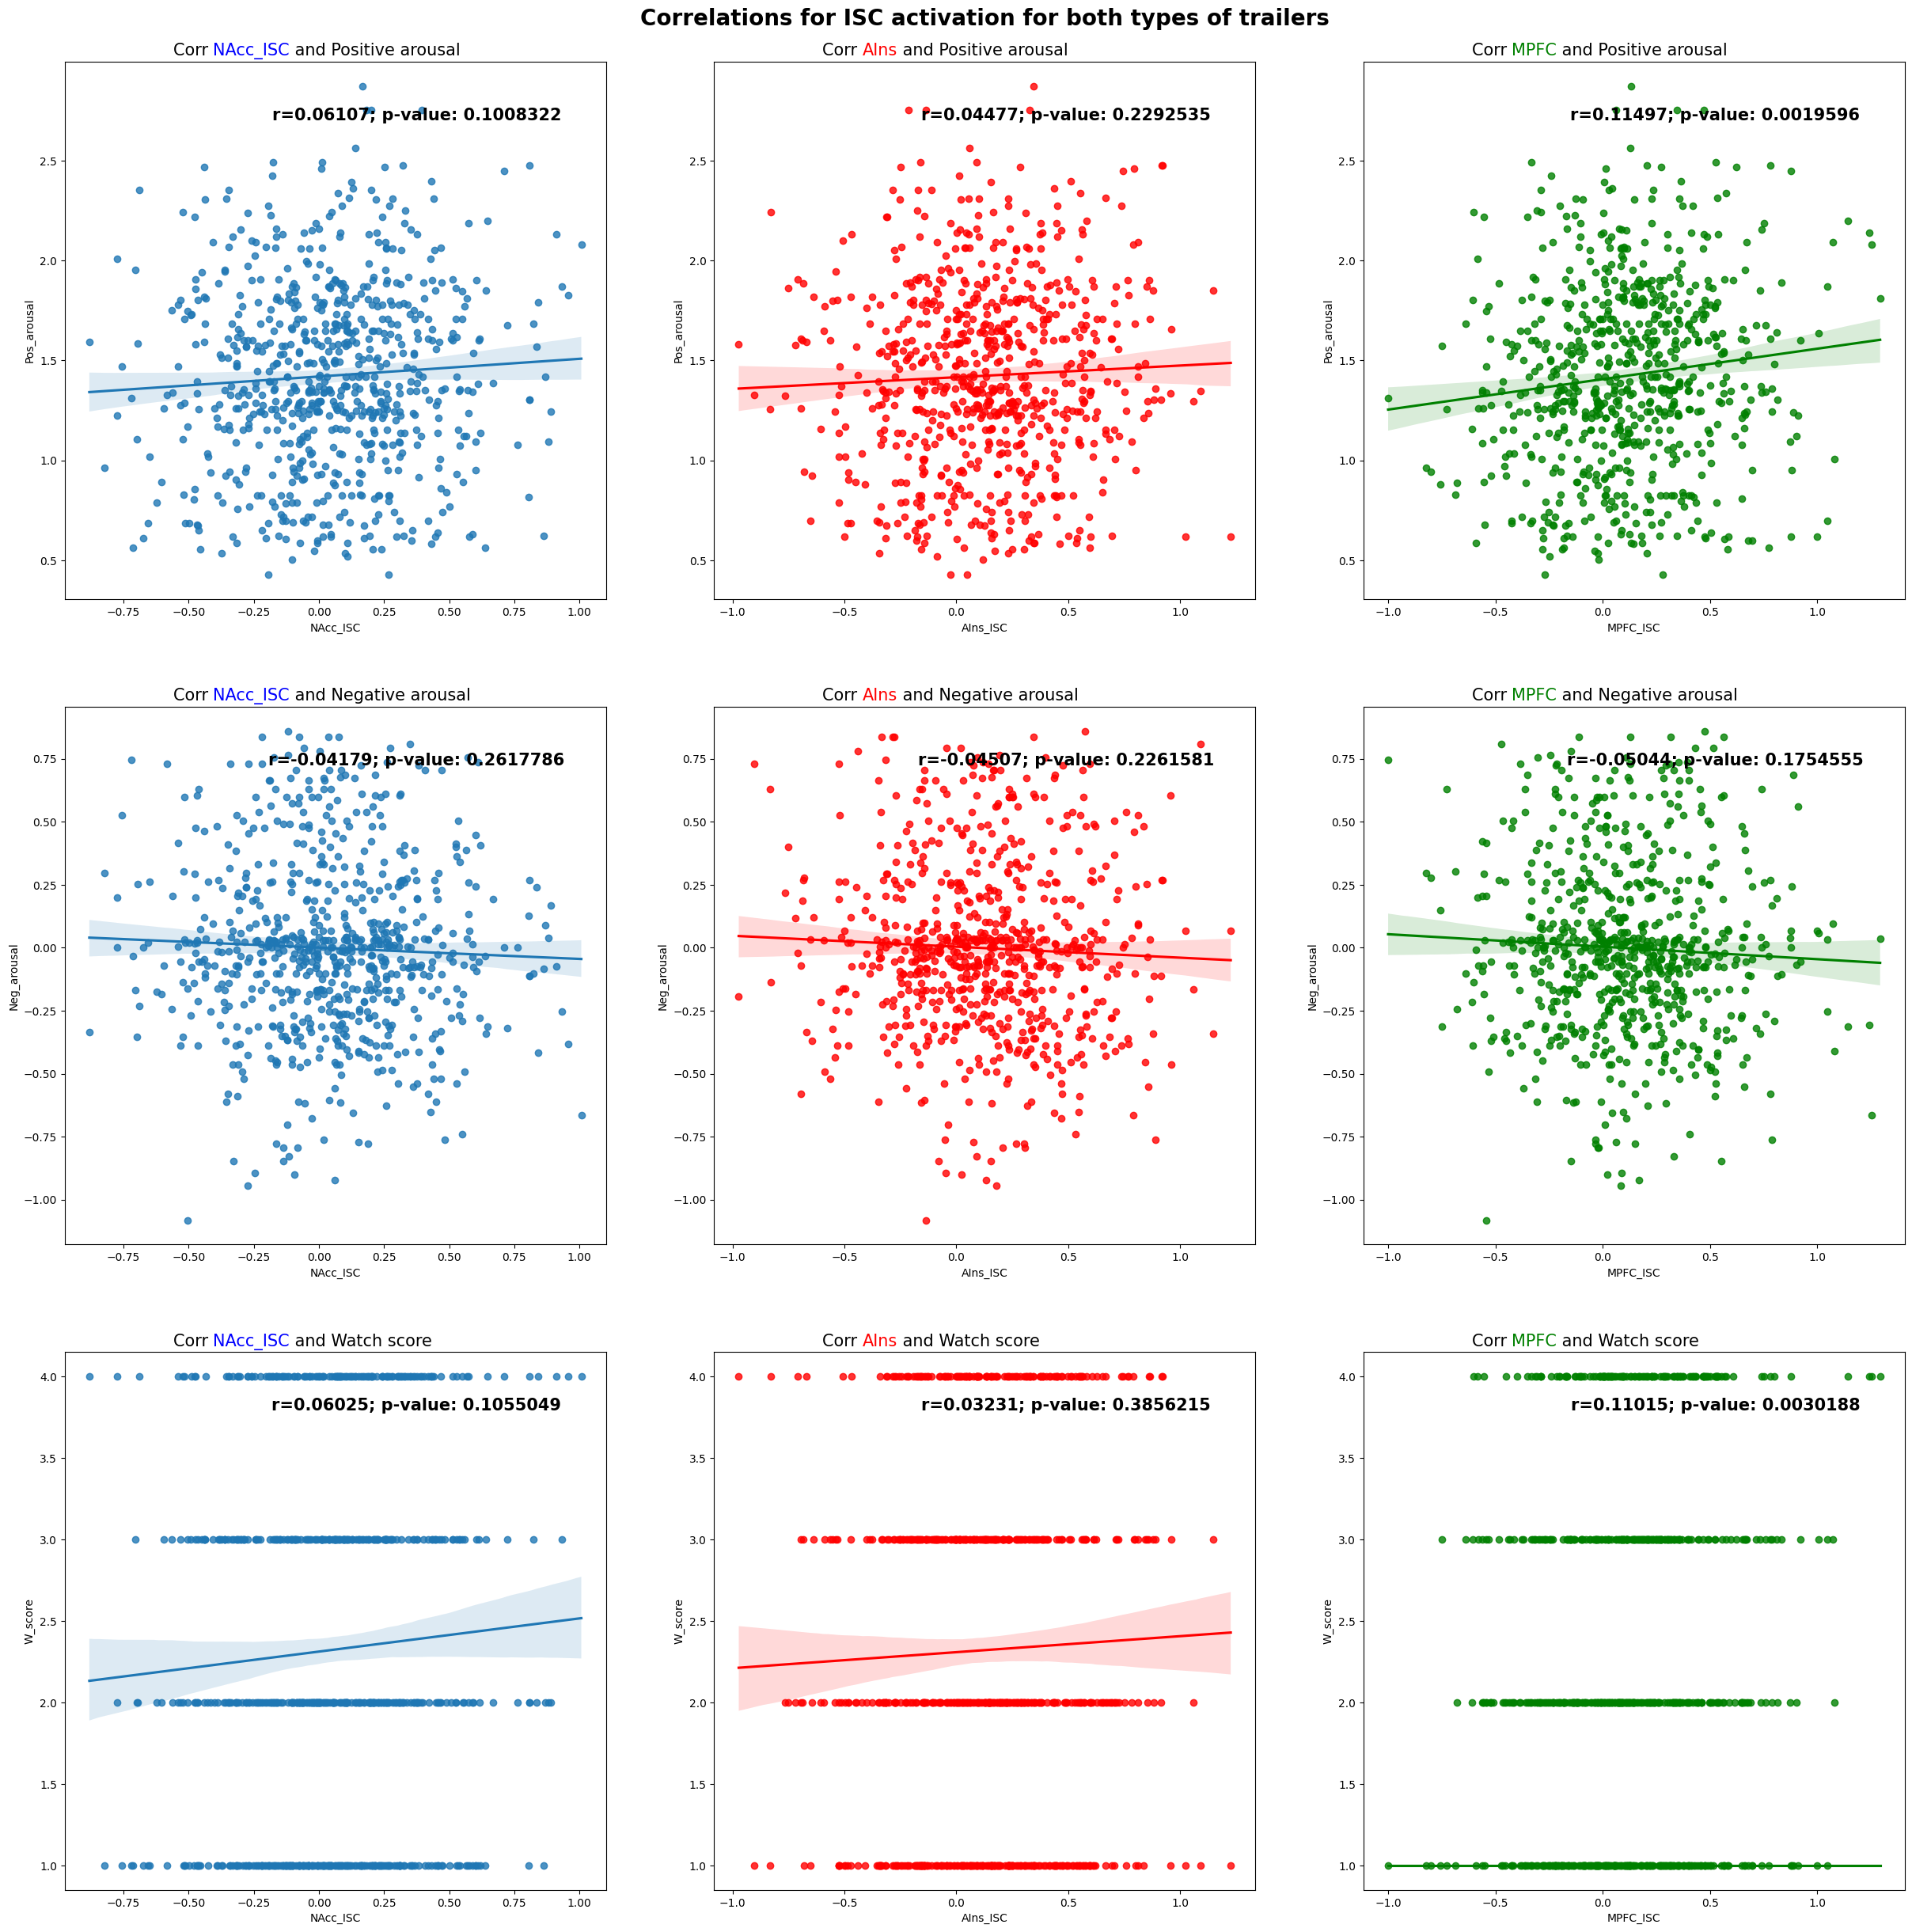

In [92]:
ISC_all_corr = [NAcc_PA_ISC_All_corr, NAcc_NA_ISC_All_corr, NAcc_W_ISC_All_corr, AIns_PA_ISC_All_corr, AIns_NA_ISC_All_corr, AIns_W_ISC_All_corr, MPFC_PA_ISC_All_corr, MPFC_NA_ISC_All_corr, MPFC_W_ISC_All_corr]
plot_correlations(all_subs_events_df, ISC_all_corr, "ISC", "Correlations for ISC activation for both types of trailers")


In [93]:
# ISC Neural Activation and PA-NA for Comedy Trailers.
NAcc_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["Pos_arousal"])
AIns_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["Pos_arousal"])
MPFC_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["Pos_arousal"])

NAcc_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["Neg_arousal"])
AIns_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["Neg_arousal"])
MPFC_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["Neg_arousal"])

NAcc_W_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["W_score"])
AIns_W_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["W_score"])
MPFC_W_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["W_score"])

print("For comedy trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_C_corr[1])))


For comedy trailers, the correlation between NAcc ISC activation and positive arousal is: 0.13588 with a p-value of: 0.009545352166841102
For comedy trailers, the correlation between AIns ISC activation and positive arousal is: 0.15953 with a p-value of: 0.002299459614464032
For comedy trailers, the correlation between MPFC ISC activation and positive arousal is: 0.16563 with a p-value of: 0.0015420143785855583

For comedy trailers, the correlation between NAcc ISC activation and negative arousal is: -0.02774 with a p-value of: 0.5983596027286437
For comedy trailers, the correlation between AIns ISC activation and negative arousal is: -0.1131 with a p-value of: 0.031218919960321535
For comedy trailers, the correlation between MPFC ISC activation and negative arousal is: -0.04458 with a p-value of: 0.3971110594840799

For comedy trailers, the correlation between NAcc ISC activation and watch scores is: 0.11246 with a p-value of: 0.03219485847878956
For comedy trailers, the correlation b

In [94]:
# ISC Neural Activation and PA-NA for Horror Trailers.
NAcc_PA_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["Pos_arousal"])
AIns_PA_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["Pos_arousal"])
MPFC_PA_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["Pos_arousal"])

NAcc_NA_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["Neg_arousal"])
AIns_NA_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["Neg_arousal"])
MPFC_NA_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["Neg_arousal"])

NAcc_W_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["W_score"])
AIns_W_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["W_score"])
MPFC_W_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["W_score"])

print("For horror trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_H_corr[1])))



For horror trailers, the correlation between NAcc ISC activation and positive arousal is: -0.03563 with a p-value of: 0.5003768211417103
For horror trailers, the correlation between AIns ISC activation and positive arousal is: -0.08801 with a p-value of: 0.09544759765211122
For horror trailers, the correlation between MPFC ISC activation and positive arousal is: 0.05333 with a p-value of: 0.3129776414616256

For horror trailers, the correlation between NAcc ISC activation and negative arousal is: -0.08071 with a p-value of: 0.12637352599637247
For horror trailers, the correlation between AIns ISC activation and negative arousal is: 0.04413 with a p-value of: 0.4038543040616145
For horror trailers, the correlation between MPFC ISC activation and negative arousal is: -0.04605 with a p-value of: 0.38367160901508296

For horror trailers, the correlation between NAcc ISC activation and watch scores is: 0.01315 with a p-value of: 0.8036397113659258
For horror trailers, the correlation betwee

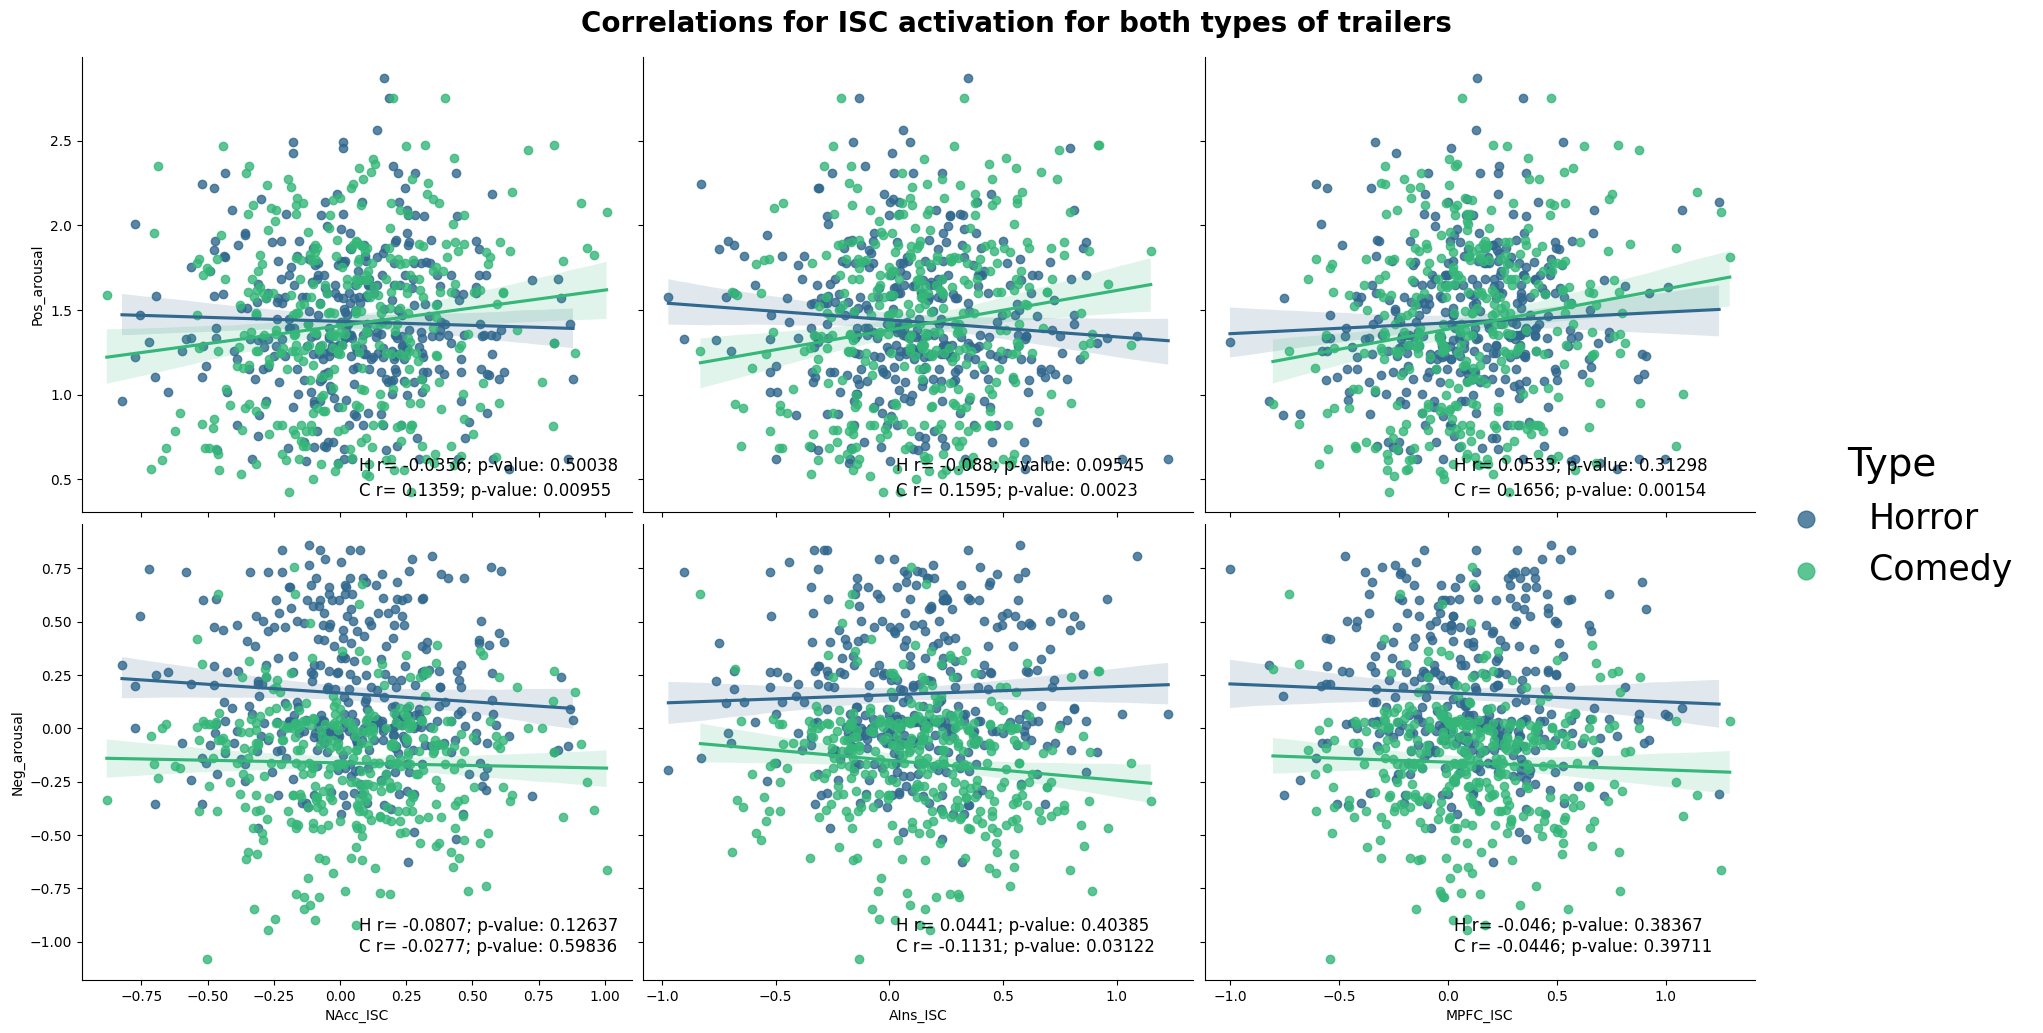

In [95]:
ISC_comedy_corr = [NAcc_PA_ISC_C_corr, NAcc_NA_ISC_C_corr, NAcc_W_ISC_C_corr, AIns_PA_ISC_C_corr, AIns_NA_ISC_C_corr, AIns_W_ISC_C_corr, MPFC_PA_ISC_C_corr, MPFC_NA_ISC_C_corr, MPFC_W_ISC_C_corr]
ISC_horror_corr = [NAcc_PA_ISC_H_corr, NAcc_NA_ISC_H_corr, NAcc_W_ISC_H_corr, AIns_PA_ISC_H_corr, AIns_NA_ISC_H_corr, AIns_W_ISC_H_corr, MPFC_PA_ISC_H_corr, MPFC_NA_ISC_H_corr, MPFC_W_ISC_H_corr]
plot_correlations_bothTrailers(all_subs_events_df, "ISC", ISC_comedy_corr, ISC_horror_corr, "Correlations for ISC activation for both types of trailers")


In [96]:
"""
# Not used. 
def corrfunc(x, y, **kws):
    print(x)
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.65, .9), xycoords=ax.transAxes) #0.65, 0.9
"""

'\n# Not used. \ndef corrfunc(x, y, **kws):\n    print(x)\n    r, _ = pearsonr(x, y)\n    ax = plt.gca()\n    ax.annotate("r = {:.2f}".format(r), xy=(.65, .9), xycoords=ax.transAxes) #0.65, 0.9\n'